# this notebook further perform DGE and enrichment analysis between ABS cells of WT and Mut condition

In [2]:
import scanpy as sc 
import numpy as np
import pandas as pd
import os
import sys
from matplotlib import pyplot as plt
import anndata as ad


In [3]:
import seaborn as sn

In [4]:
sys.path.append("/home/lucy/star_proto_filter/")
sys.path.append("/home/lucy/")
sys.path.append("/home/lucy/AmbientContaminationMetrics/")
#sys.path.append("/home/lucy/quality/plot_quality_score.py")


In [5]:
import zc_filter_function as zc_filter
import quality_control_function as zc_qc
import plot_quality_score as qc_plt
import zc_function as zc

In [6]:
filtered_data_dir = '/home/lucy/Dropbox (VU Basic Sciences)/random_data_check/filtered_data/'

## load data

In [7]:
dat = sc.read("./new_sample_10868_filtered/subsampled_combine_WT_Mut.h5ad" )

In [8]:
dat

AnnData object with n_obs × n_vars = 9010 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

## DGE

In [9]:
subsampled_comb = dat

In [10]:
ab = subsampled_comb[subsampled_comb.obs['cell_type'] == 'ABS' ] 

In [11]:
ab

View of AnnData object with n_obs × n_vars = 2823 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [13]:
sc.tl.rank_genes_groups( ab, groupby='condition',  reference= 'WT', use_raw= False, layer='arcsinh', method = 'wilcoxon', key_added='abs_DGE' , )

/home/lucy/.local/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


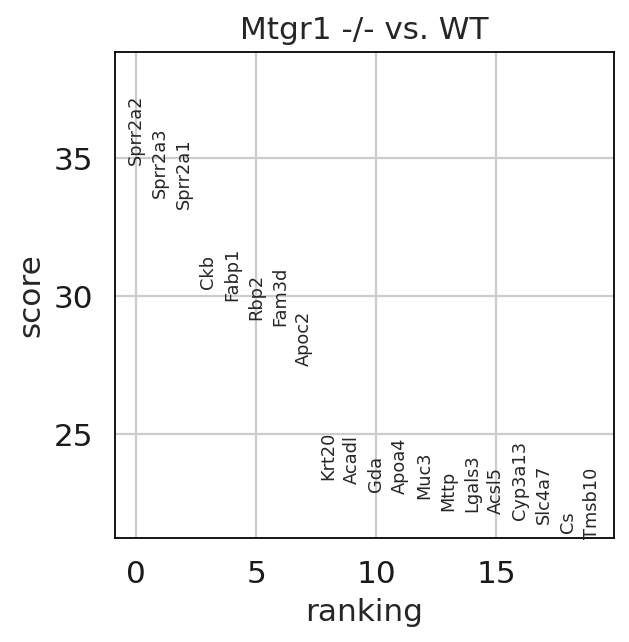

In [14]:
sc.pl.rank_genes_groups( ab, key='abs_DGE' )

In [17]:
sc.tl.rank_genes_groups( ab, groupby='condition',  reference= 'Mtgr1 -/-', use_raw= False, layer='arcsinh', method = 'wilcoxon', key_added='abs_DGE_inverse' , )

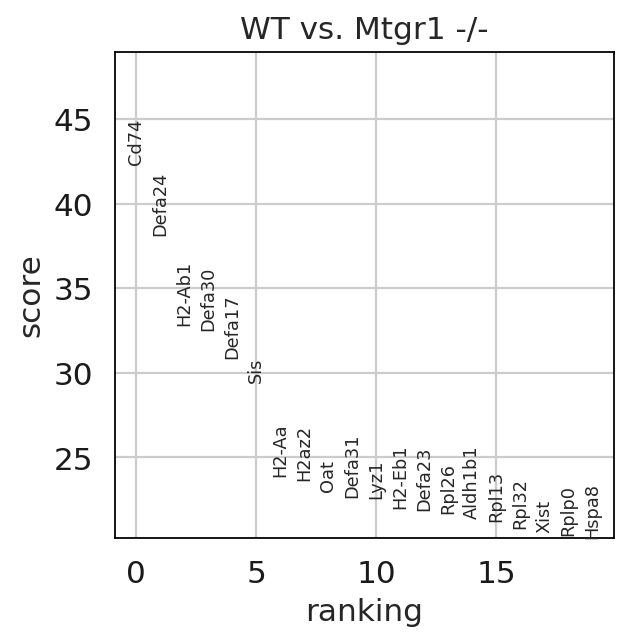

In [18]:
sc.pl.rank_genes_groups( ab, key='abs_DGE_inverse' )

In [19]:
ab.obs['condition'].value_counts()

condition
Mtgr1 -/-    1468
WT           1355
Name: count, dtype: int64

In [20]:
ab.obs['sample'].value_counts()

sample
10868_5    1468
10868_3     557
10868_2     441
10868_1     357
Name: count, dtype: int64

In [21]:
ab

AnnData object with n_obs × n_vars = 2823 × 23312
    obs: 'sample', 'cell_type', 'cytotrace', 'leiden', 'condition'
    var: 'mean', 'std'
    uns: 'cell_type_colors', 'condition_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'treatment_colors', 'umap', 'abs_DGE', 'abs_DGE_inverse'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'arcsinh', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [22]:
mut_rnk_dict = ab.uns['abs_DGE']
wt_rnk_dict = ab.uns['abs_DGE_inverse']

In [23]:
mut_rnk_dict

{'params': {'groupby': 'condition',
  'reference': 'WT',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': 'arcsinh',
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('Sprr2a2',), ('Sprr2a3',), ('Sprr2a1',), ..., ('H2-Ab1',),
            ('Defa24',), ('Cd74',)],
           dtype=[('Mtgr1 -/-', 'O')]),
 'scores': rec.array([( 34.79273 ,), ( 33.596935,), ( 33.185234,), ...,
            (-32.80656 ,), (-38.120026,), (-42.35286 ,)],
           dtype=[('Mtgr1 -/-', '<f4')]),
 'pvals': rec.array([(3.13323616e-265,), (1.85958151e-247,), (1.75817549e-241,),
            ..., (4.74733514e-236,), (0.00000000e+000,),
            (0.00000000e+000,)],
           dtype=[('Mtgr1 -/-', '<f8')]),
 'pvals_adj': rec.array([(2.43473338e-261,), (1.08376410e-243,), (8.19731741e-238,),
            ..., (1.84449795e-232,), (0.00000000e+000,),
            (0.00000000e+000,)],
           dtype=[('Mtgr1 -/-', '<f8')]),
 'logfoldchanges': rec.array([( 4.6072307,), ( 4.2575817,), ( 4.0870867,), ..

In [24]:
mut_dge_res = zc.parse_rank_gene_group_dict(mut_rnk_dict, fields_to_keep = ['logfoldchanges', 'pvals_adj', 'pvals', 'names', 'scores'], 
                               condition = 'Mtgr1 -/-', sort_by = 'scores', ascending = True)

In [25]:
wt_dge_res = zc.parse_rank_gene_group_dict(wt_rnk_dict, fields_to_keep = ['logfoldchanges', 'pvals_adj', 'pvals', 'names', 'scores'], 
                               condition = 'WT', sort_by = 'scores', ascending = True)

In [26]:
wt_dge_res.head()

logfoldchanges      pvals_adj          pvals    names     scores
23311       -4.607231  2.434733e-261  3.133236e-265  Sprr2a2 -34.792728
23310       -4.257582  1.083764e-243  1.859582e-247  Sprr2a3 -33.596935
23309       -4.087087  8.197317e-238  1.758175e-241  Sprr2a1 -33.185234
23308       -2.236422  7.769100e-198  2.999395e-201      Ckb -30.268274
23307       -2.416477  2.244205e-192  9.626824e-196    Fabp1 -29.846914

In [27]:
mut_dge_res.head()

logfoldchanges      pvals_adj          pvals   names     scores
23311       -5.885524   0.000000e+00   0.000000e+00    Cd74 -42.352859
23310       -4.209413   0.000000e+00   0.000000e+00  Defa24 -38.120026
23309       -4.816689  1.844498e-232  4.747335e-236  H2-Ab1 -32.806561
23308       -3.898772  1.582917e-228  4.753097e-232  Defa30 -32.524826
23307       -3.764370  6.527215e-206  2.239950e-209  Defa17 -30.879665

In [28]:
wt_dge_res.tail()

logfoldchanges      pvals_adj          pvals   names     scores
4        3.764370  6.527215e-206  2.239950e-209  Defa17  30.879665
3        3.898772  1.582917e-228  4.753097e-232  Defa30  32.524826
2        4.816689  1.844498e-232  4.747335e-236  H2-Ab1  32.806561
1        4.209413   0.000000e+00   0.000000e+00  Defa24  38.120026
0        5.885524   0.000000e+00   0.000000e+00    Cd74  42.352859

confirmed that they are the same gene and score list but just inverted in sign and order

## GSEA

In [29]:
import gseapy as gp

### get gene list:
- filter out gene with > 0.05 adj pvals
- sorted based on logfold changes

In [30]:
mut_dge_res.shape

(23312, 5)

In [31]:
significant_genes = mut_dge_res[mut_dge_res['pvals_adj'] < 0.05 ] 

In [32]:
significant_genes.shape

(2925, 5)

In [37]:
mut_up = significant_genes[significant_genes['logfoldchanges'] > 0 ]

In [50]:
mut_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)
mut_up.head()

/tmp/ipykernel_995311/2443826550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mut_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)


logfoldchanges      pvals_adj          pvals    names     scores
0        4.607231  2.434733e-261  3.133236e-265  Sprr2a2  34.792728
1        4.257582  1.083764e-243  1.859582e-247  Sprr2a3  33.596935
2        4.087087  8.197317e-238  1.758175e-241  Sprr2a1  33.185234
3        2.236422  7.769100e-198  2.999395e-201      Ckb  30.268274
4        2.416477  2.244205e-192  9.626824e-196    Fabp1  29.846914

In [39]:
wt_up = significant_genes[significant_genes['logfoldchanges'] < 0 ]

In [48]:
wt_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)
wt_up.head()

/tmp/ipykernel_995311/222807914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wt_up.sort_values( by= 'pvals_adj', ascending= True, inplace= True)


logfoldchanges      pvals_adj          pvals   names     scores
23311       -5.885524   0.000000e+00   0.000000e+00    Cd74 -42.352859
23310       -4.209413   0.000000e+00   0.000000e+00  Defa24 -38.120026
23309       -4.816689  1.844498e-232  4.747335e-236  H2-Ab1 -32.806561
23308       -3.898772  1.582917e-228  4.753097e-232  Defa30 -32.524826
23307       -3.764370  6.527215e-206  2.239950e-209  Defa17 -30.879665

In [41]:
wt_up.shape

(1386, 5)

In [42]:
mut_up.shape

(1539, 5)

### Enrichment 

In [43]:
gs = [ 'GO_Biological_Process_2023', 'WikiPathways_2019_Mouse', 'KEGG_2019_Mouse']

In [51]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_mut_up = gp.enrichr(gene_list=mut_up['names'].iloc[0:500], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [52]:
enr_wt_up = gp.enrichr(gene_list=wt_up['names'].iloc[0:500], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [56]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr_mut_up_long = gp.enrichr(gene_list=mut_up['names'], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [57]:
enr_wt_up_long = gp.enrichr(gene_list=wt_up['names'], # or "./tests/data/gene_list.txt",
                 gene_sets=gs,
                 organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

### visualization

In [44]:
sn.color_palette("Set2", len(gs)).as_hex()

['#66c2a5', '#fc8d62', '#8da0cb']

In [45]:
clr = sn.color_palette("Set2", len(gs)).as_hex()

In [46]:
color_dict = dict( zip(gs,clr  ))

In [47]:
color_dict

{'GO_Biological_Process_2023': '#66c2a5',
 'WikiPathways_2019_Mouse': '#fc8d62',
 'KEGG_2019_Mouse': '#8da0cb'}

In [53]:
enr_mut_up.results.head()

Gene_set   
0  GO_Biological_Process_2023  \
1  GO_Biological_Process_2023   
2  GO_Biological_Process_2023   
3  GO_Biological_Process_2023   
4  GO_Biological_Process_2023   

                                                Term Overlap       P-value   
0  Very-Low-Density Lipoprotein Particle Assembly...    8/10  6.216558e-12  \
1                    Glycolytic Process (GO:0006096)    9/29  2.278111e-08   
2                    Sterol Homeostasis (GO:0055092)   13/73  2.801951e-08   
3         Monocarboxylic Acid Transport (GO:0015718)   13/73  2.801951e-08   
4            Pyruvate Metabolic Process (GO:0006090)   11/50  3.307069e-08   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio   
0      1.555383e-08            0                     0  158.520325  \
1      1.654858e-05            0                     0   17.853360   
2      1.654858e-05            0                     0    8.648871   
3      1.654858e-05            0                     0    8.648871   
4      1.654858e-05            0                     0   11.224949   

   Combined Score                                              Genes  
0     4090.427514    DGAT1;SOAT2;LPCAT3;MTTP;APOC3;CIDEB;APOB;MFSD2A  
1      314.171547     LDHA;TPI1;PKM;PKLR;HKDC1;PGK1;ENO1;ALDOB;GAPDH  
2      150.407017  ABCG8;DGAT2;EPHX2;MTTP;IL18;APOA1;APOC3;APOA4;...  
3      150.407017  ABCC2;SLC51B;FABP1;SLC9A3R1;FABP2;CEACAM1;SLC6...  
4      193.345460  LDHA;TPI1;PKM;PKLR;HKDC1;ME1;PGK1;ENO1;ALDOB;P...

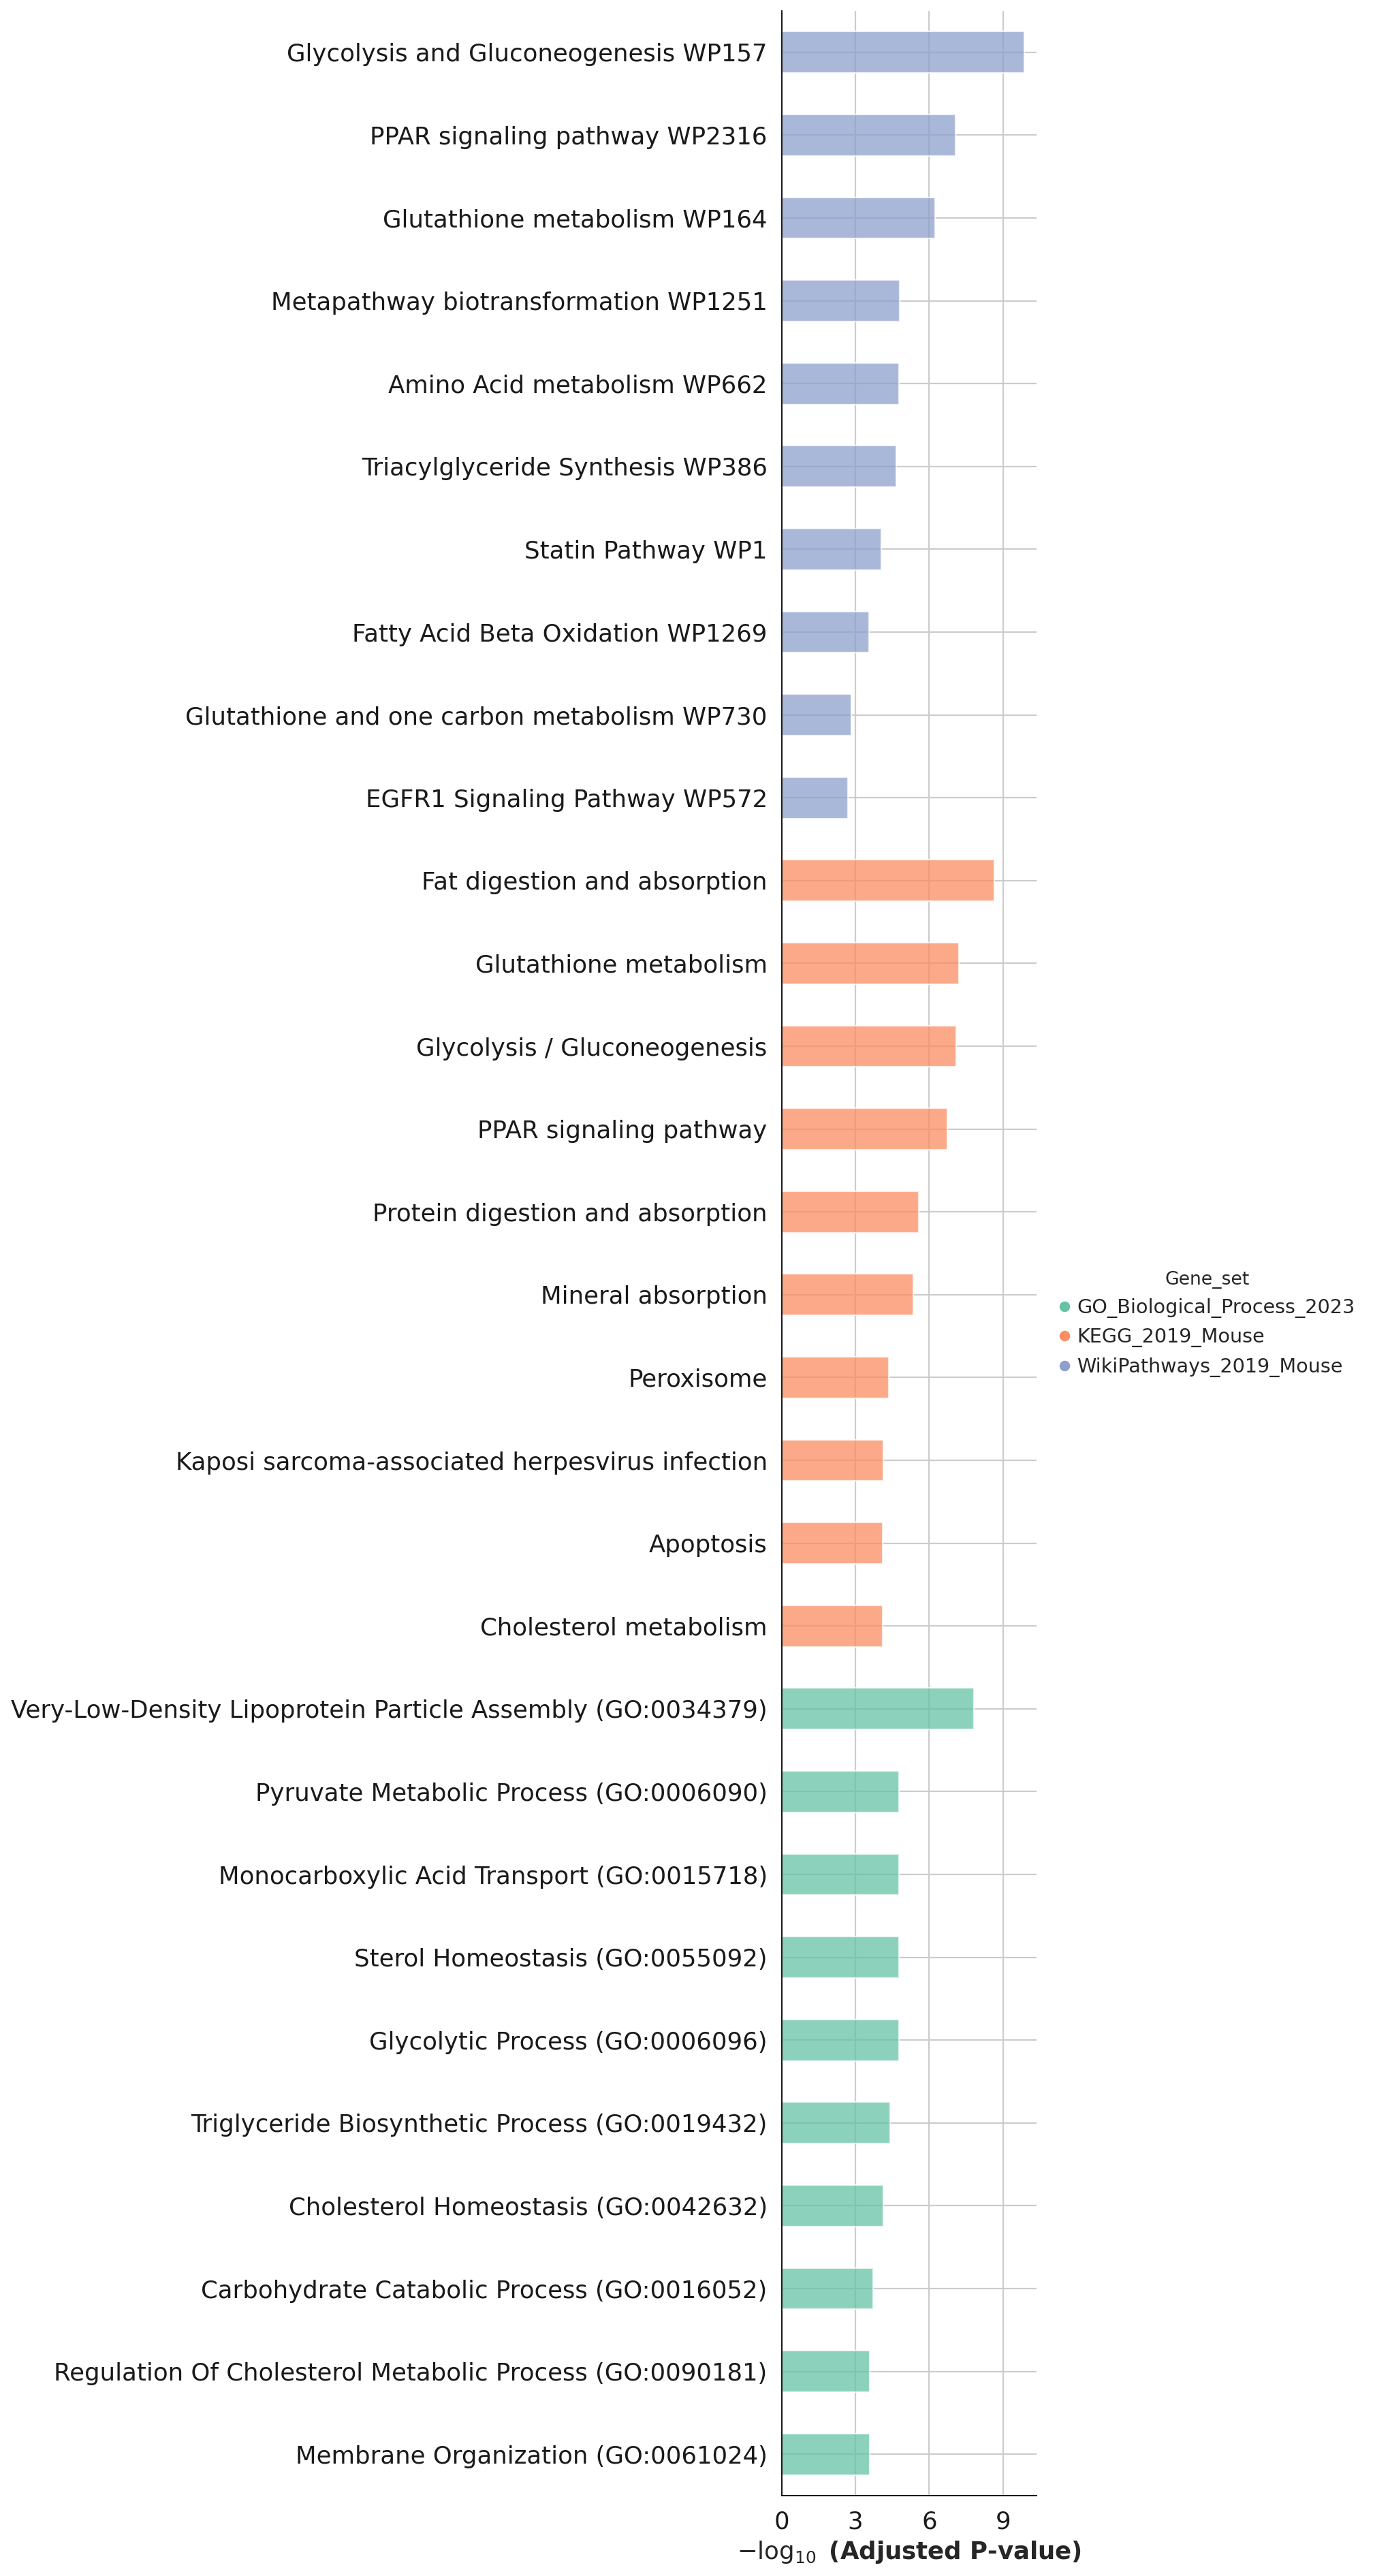

In [54]:
x = gp.barplot(enr_mut_up.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,30),
               color = clr
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

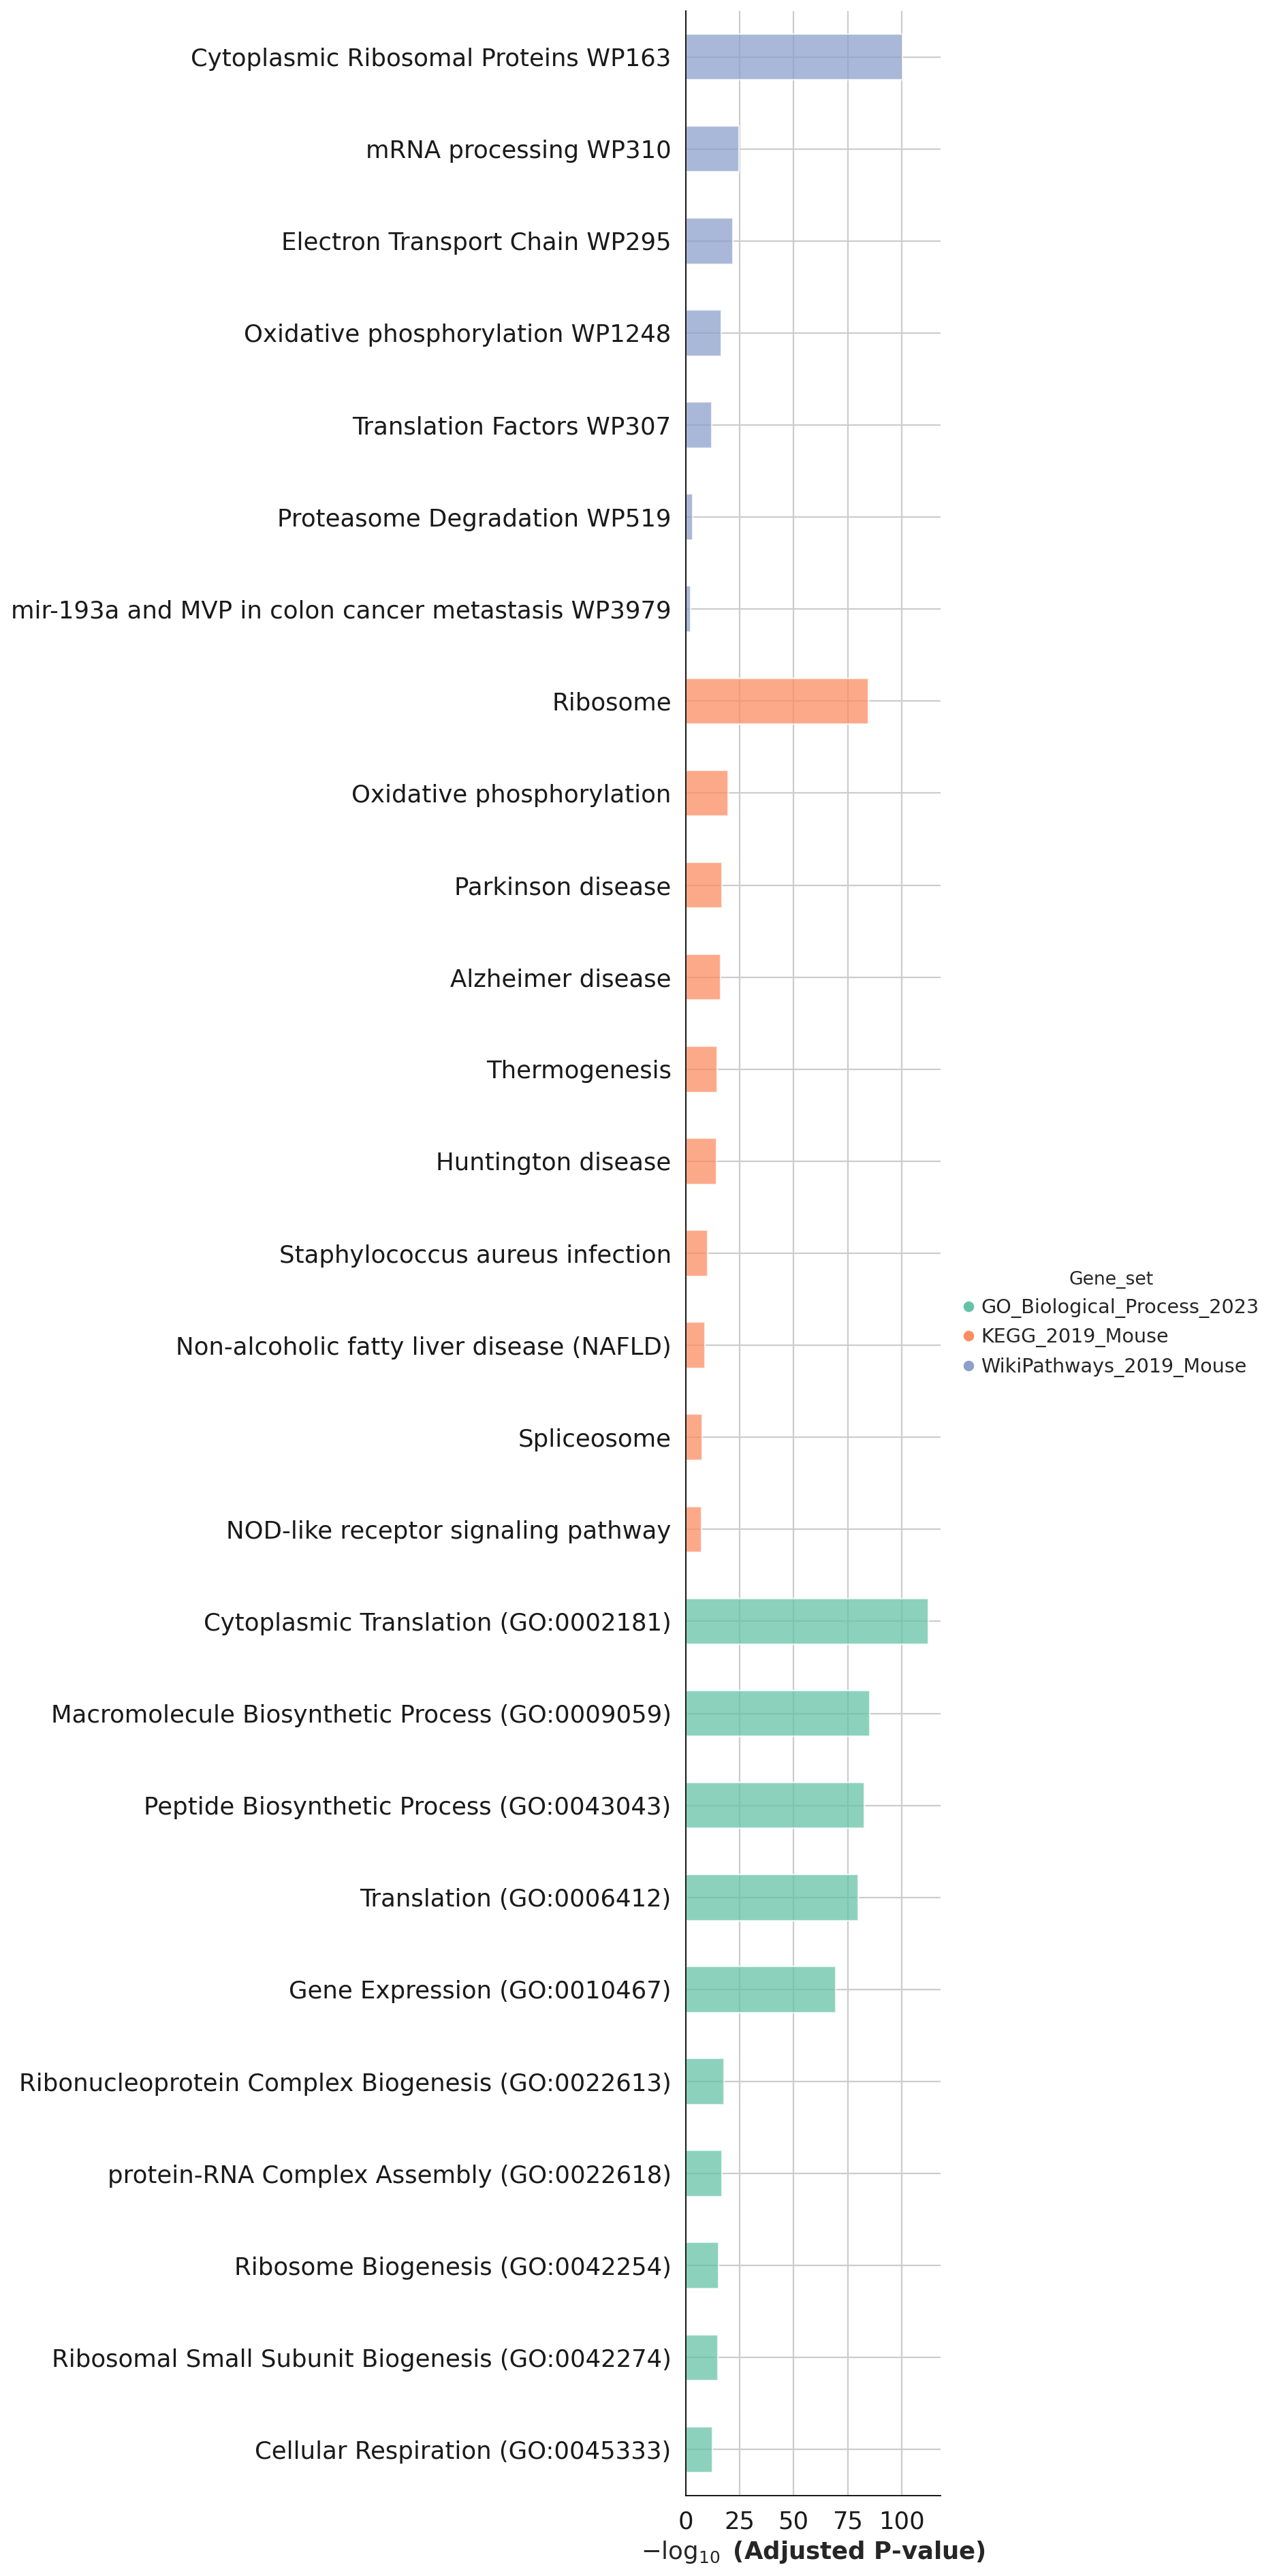

In [55]:
y = gp.barplot(enr_wt_up.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,30),
               color = clr
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

result from enrichment run on all 1300 genes instead of the top 500 genes

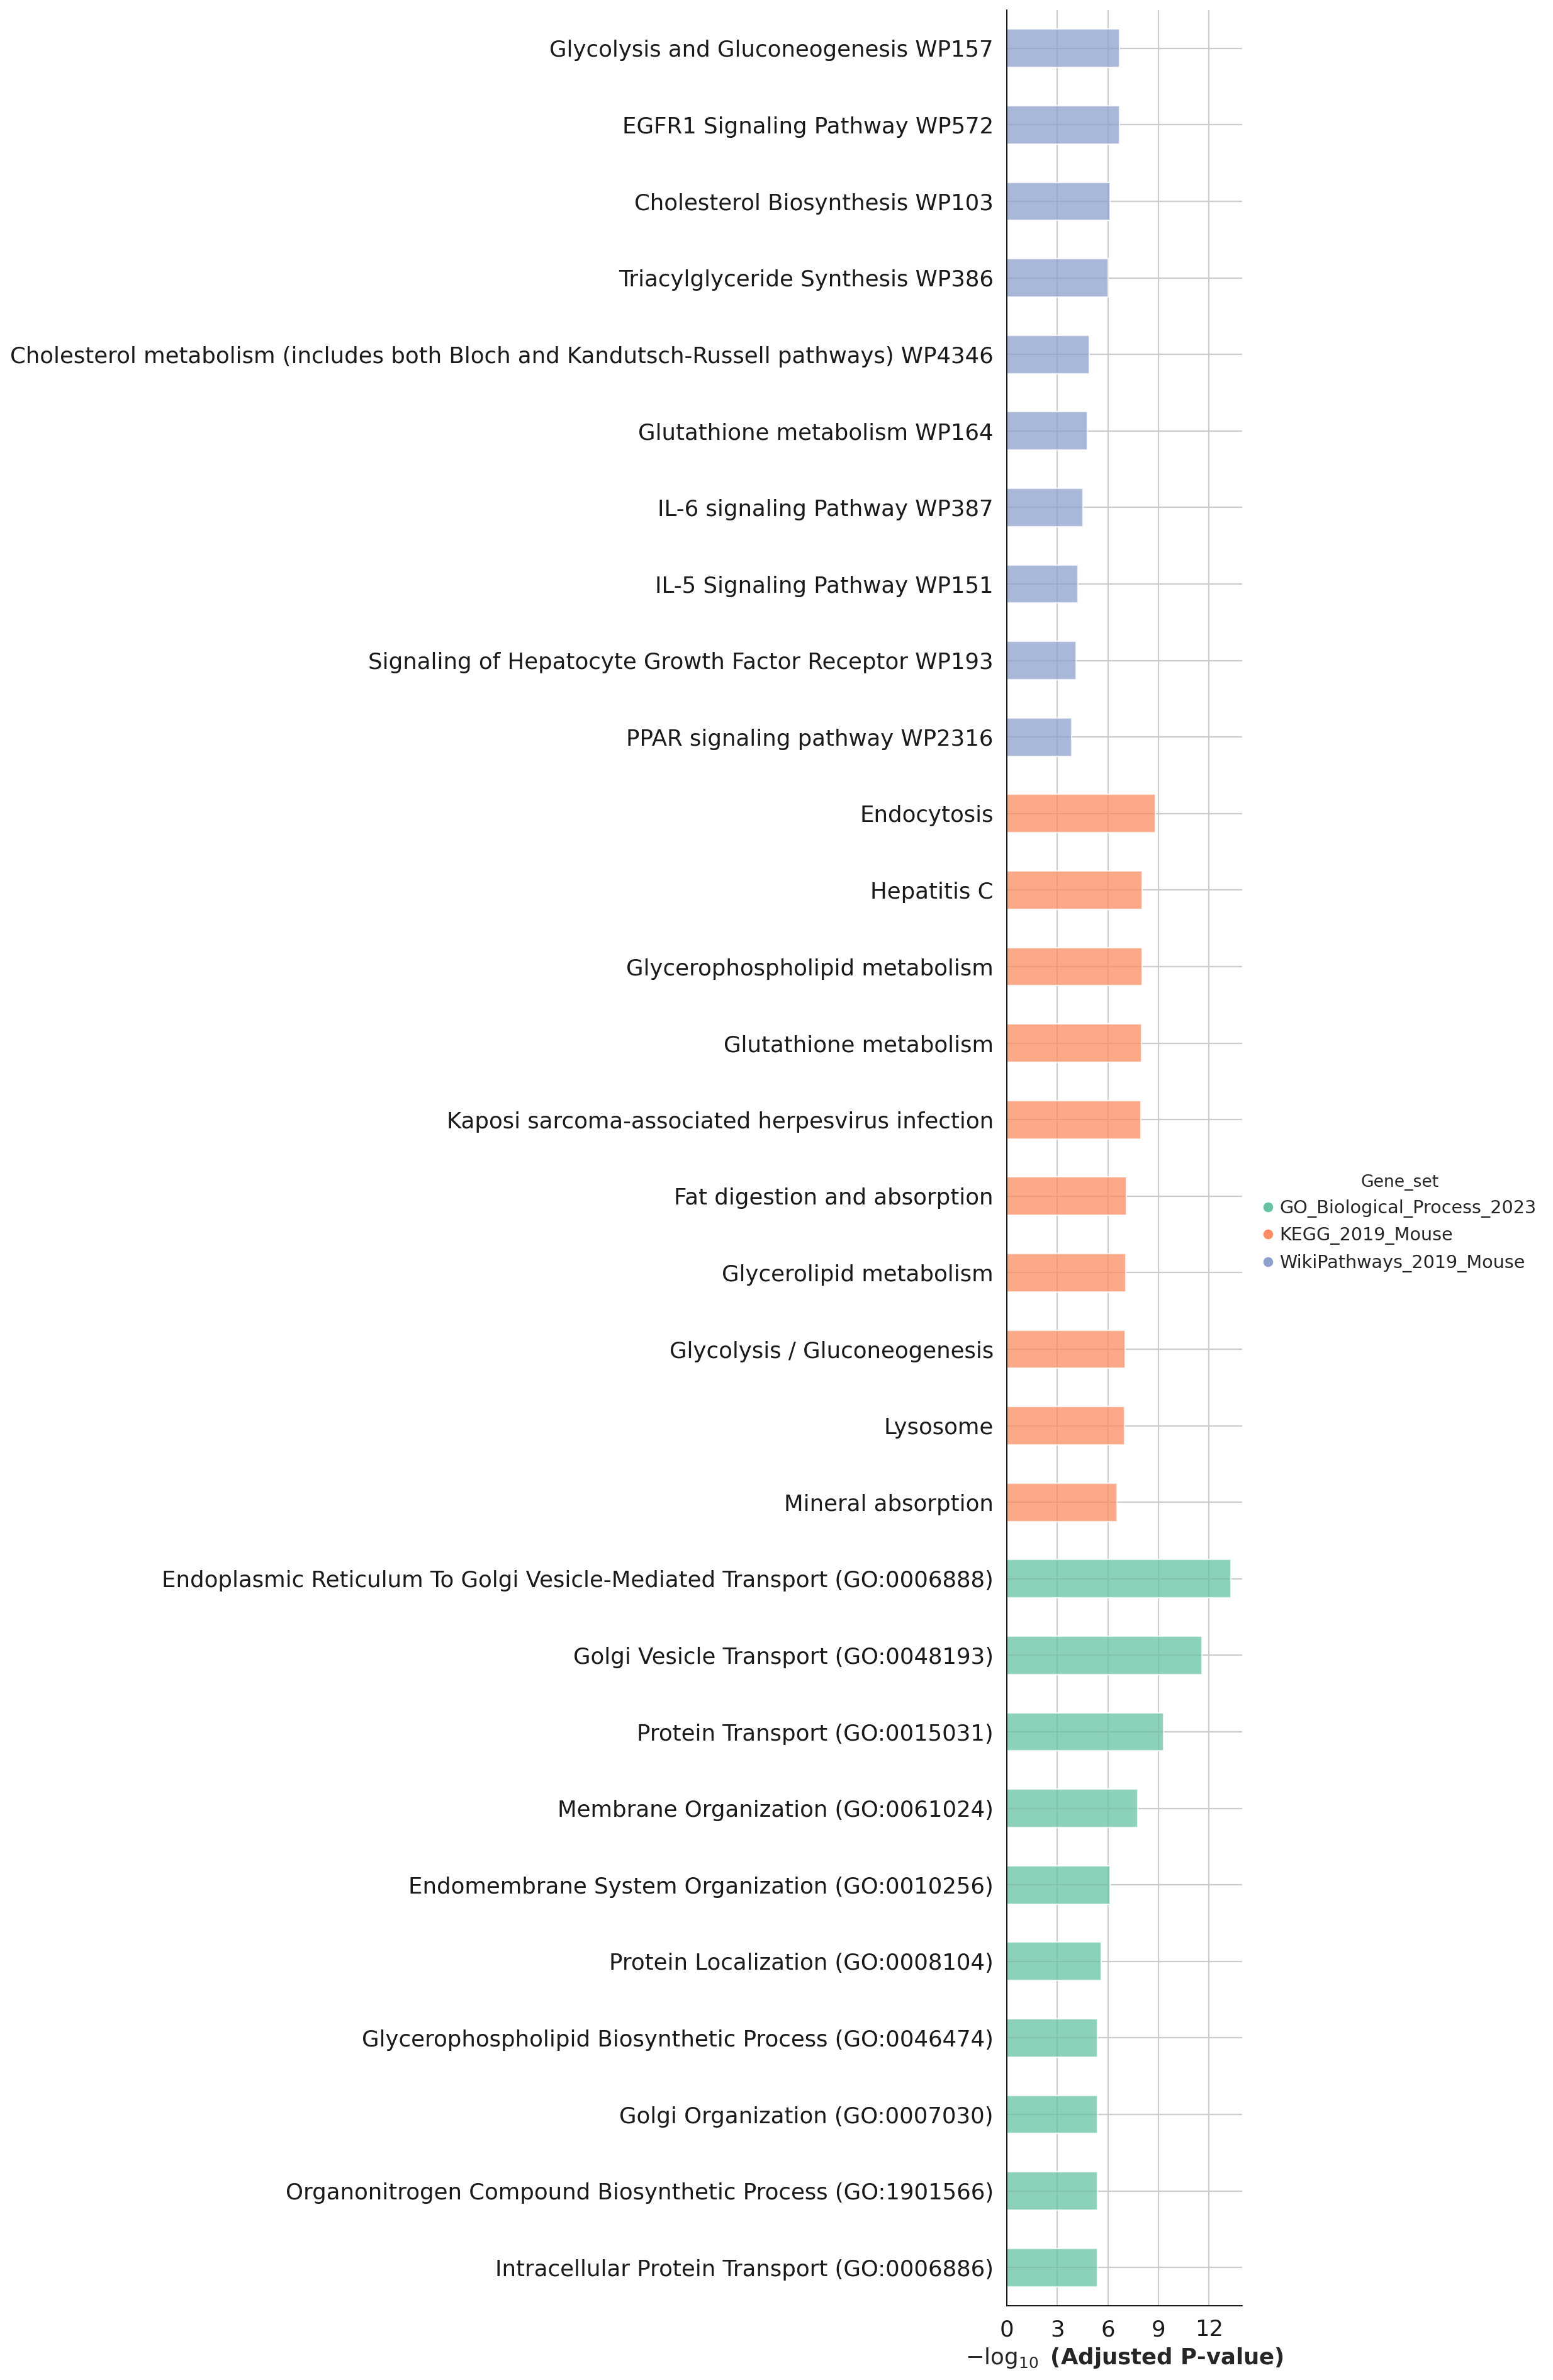

In [58]:
x2 = gp.barplot(enr_mut_up_long.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,30),
               color = clr
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

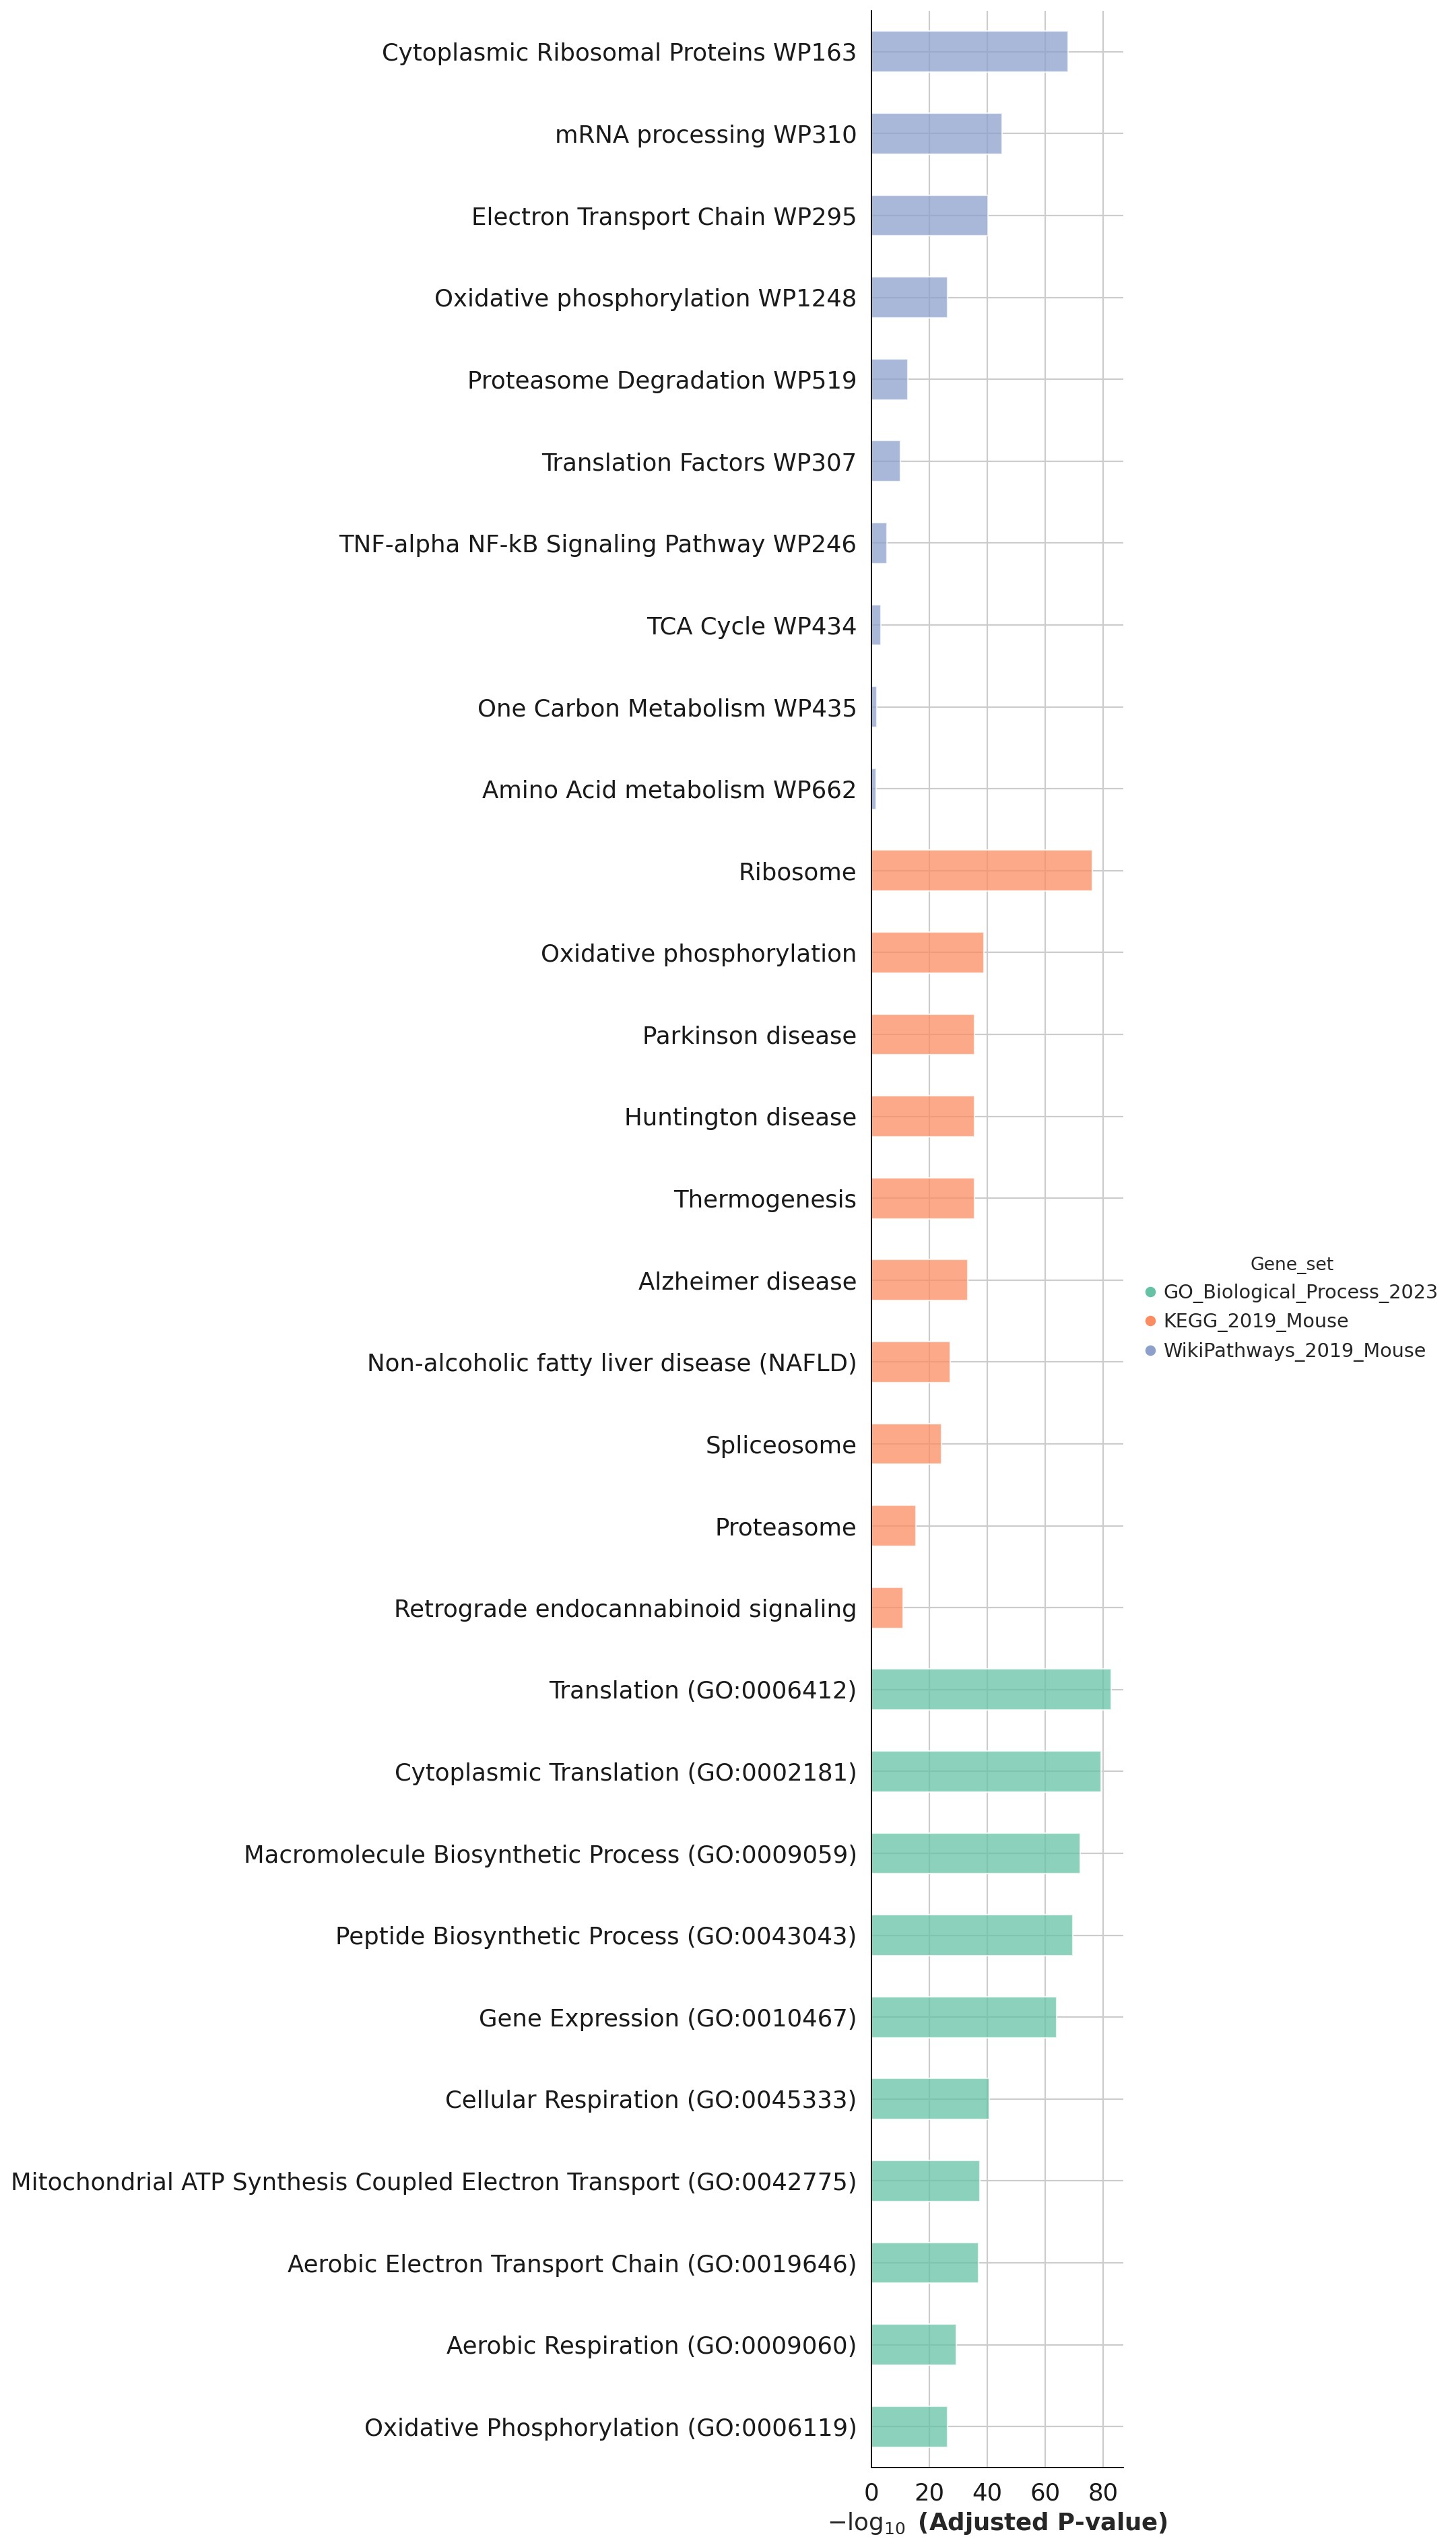

In [59]:
y2 = gp.barplot(enr_wt_up_long.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(3,30),
               color = clr
              #color=['darkred', 'darkblue'] # set colors for group
              #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
             )

### plot the top 50 term for each gene set separately

In [60]:
t5_mut_enr_ls = []

In [61]:
for i in range(len( gs)):
    
    er = gp.enrichr(gene_list=mut_up['names'], # or "./tests/data/gene_list.txt",
                     gene_sets=[gs[i]],
                     organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
    t5_mut_enr_ls.append( er)

In [62]:
t5_wt_enr_ls = []

In [63]:
for i in range(len( gs)):
    
    er = gp.enrichr(gene_list=wt_up['names'], # or "./tests/data/gene_list.txt",
                     gene_sets=[gs[i]],
                     organism='mouse', # don't forget to set organism to the one you desired! e.g. Yeast
                     outdir=None, # don't write to disk
                    )
    t5_wt_enr_ls.append( er)

88

#### plot enriched terms
- top 50 significant terms 
- separate library

In [64]:
#significant_term = t5_mut_enr_ls[0].results[ t5_mut_enr_ls[0].results['Adjusted P-value'] < 0.05 ]

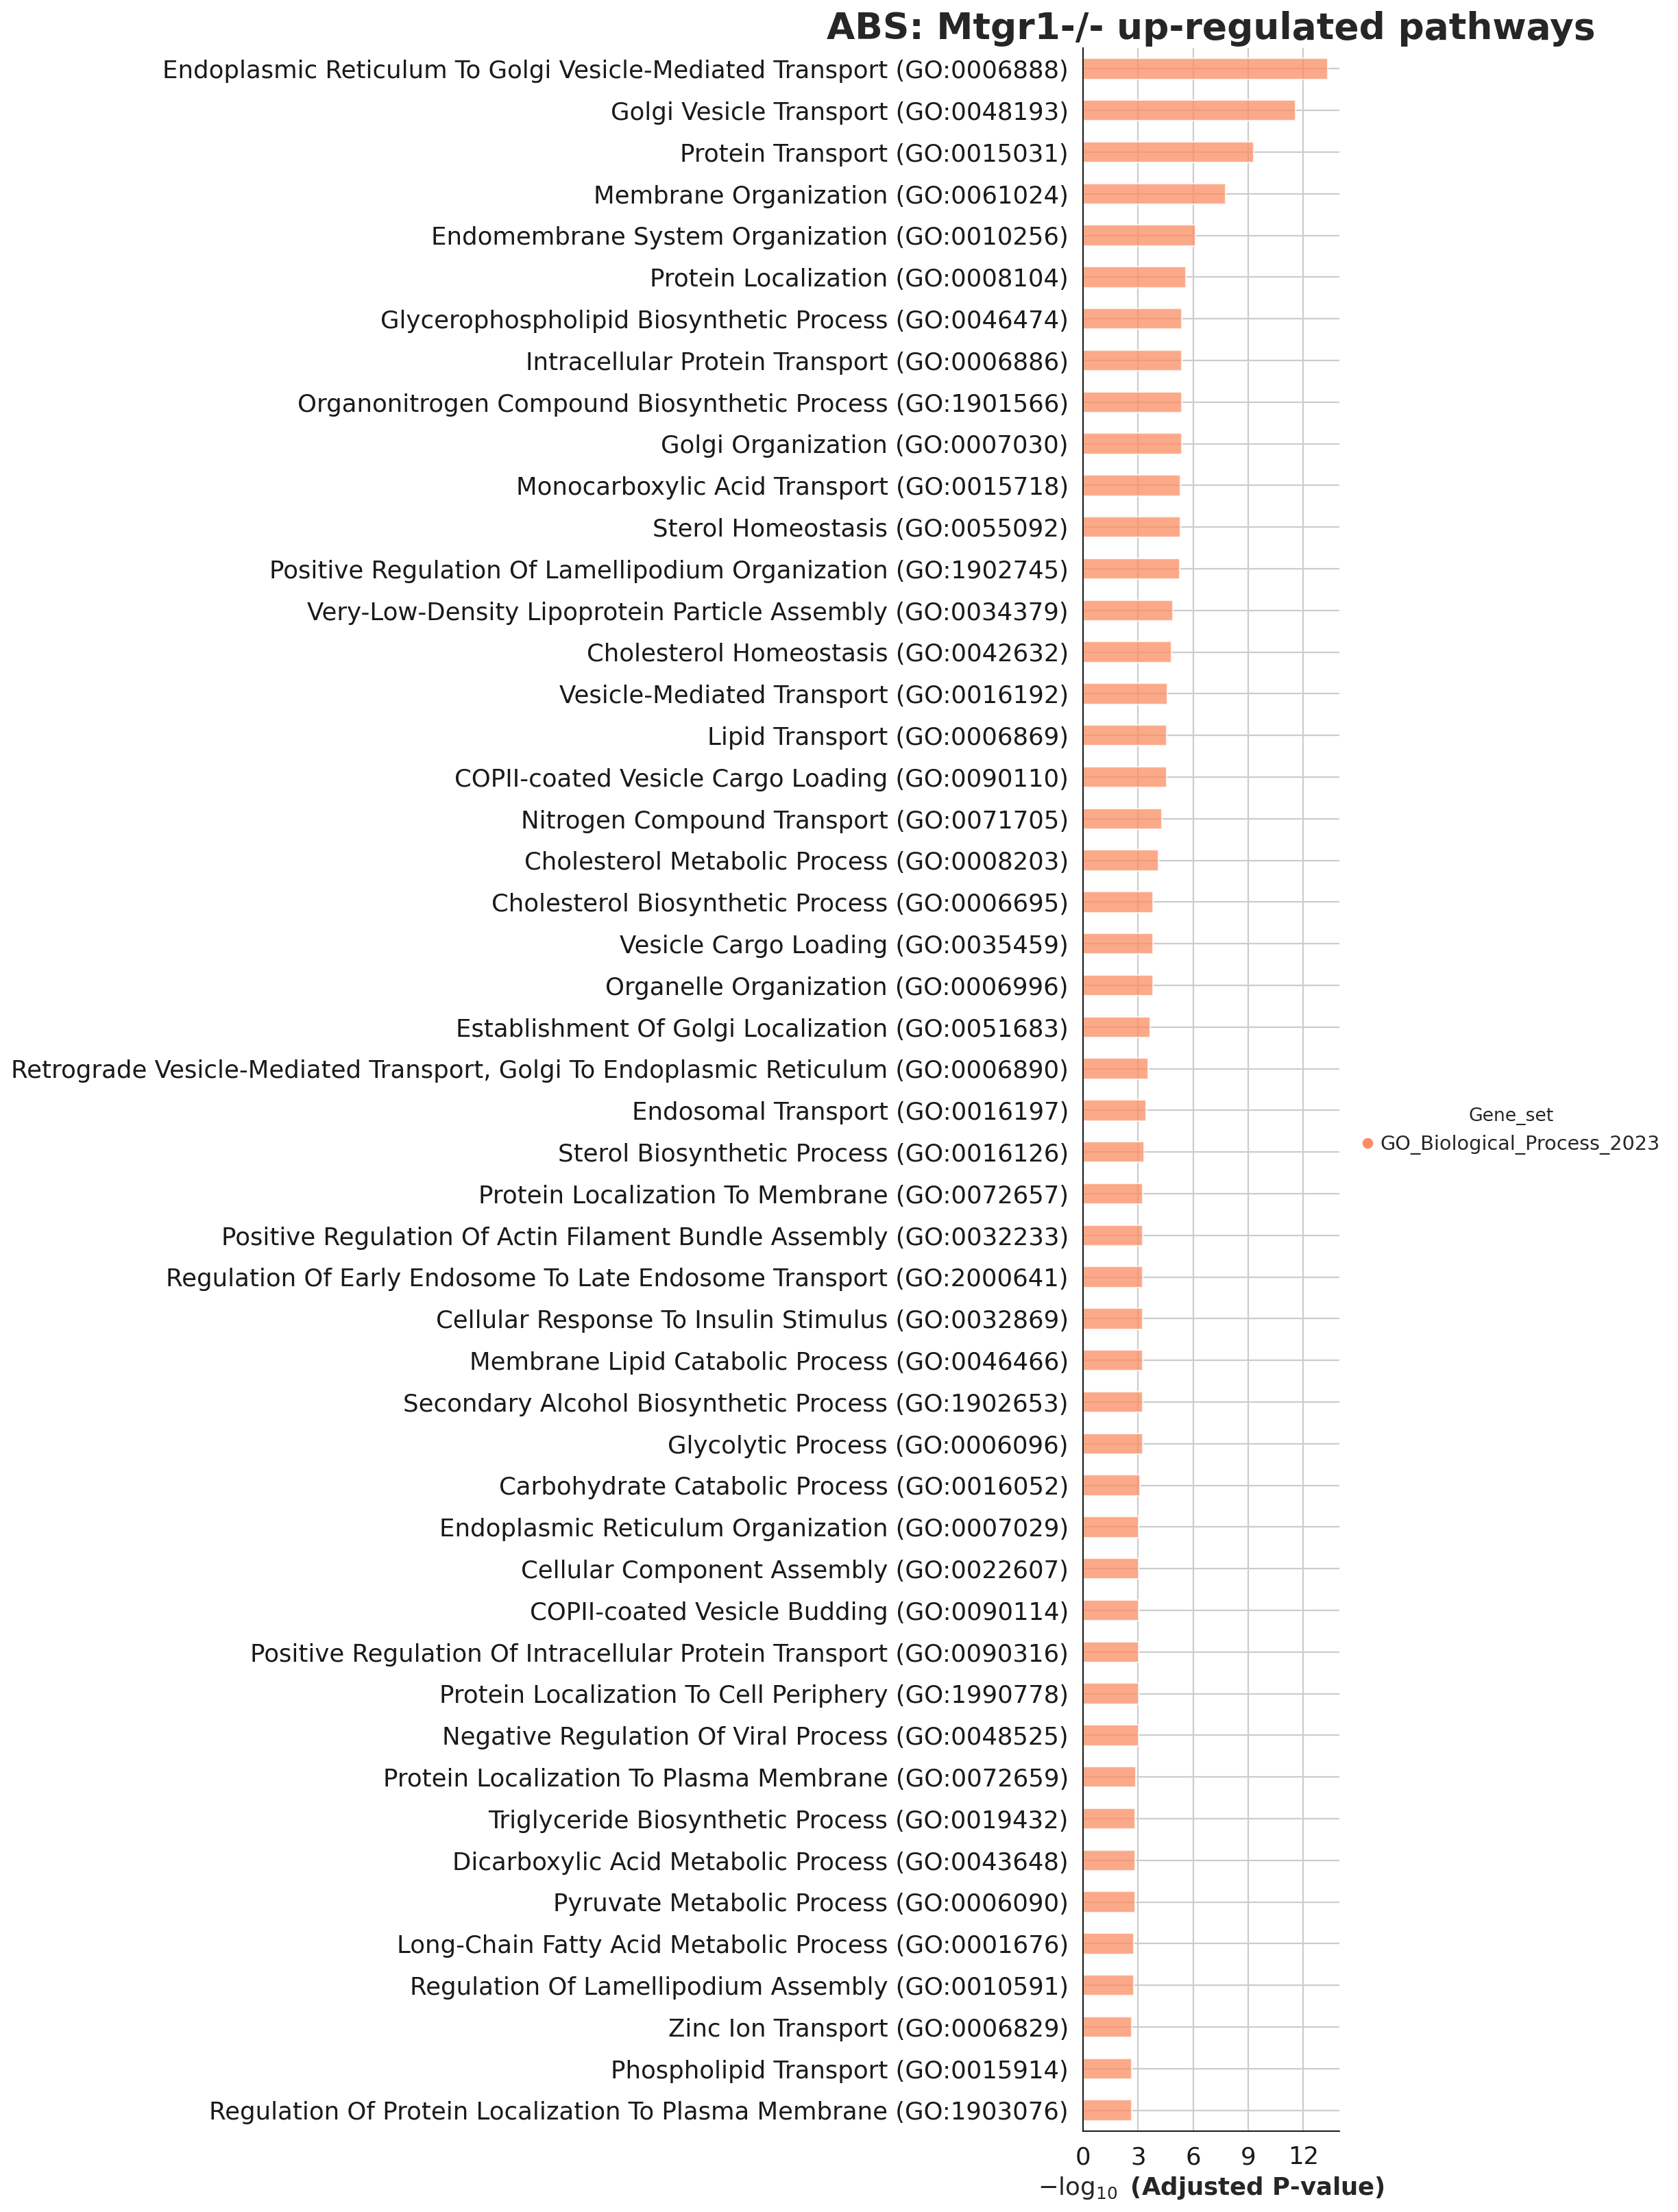

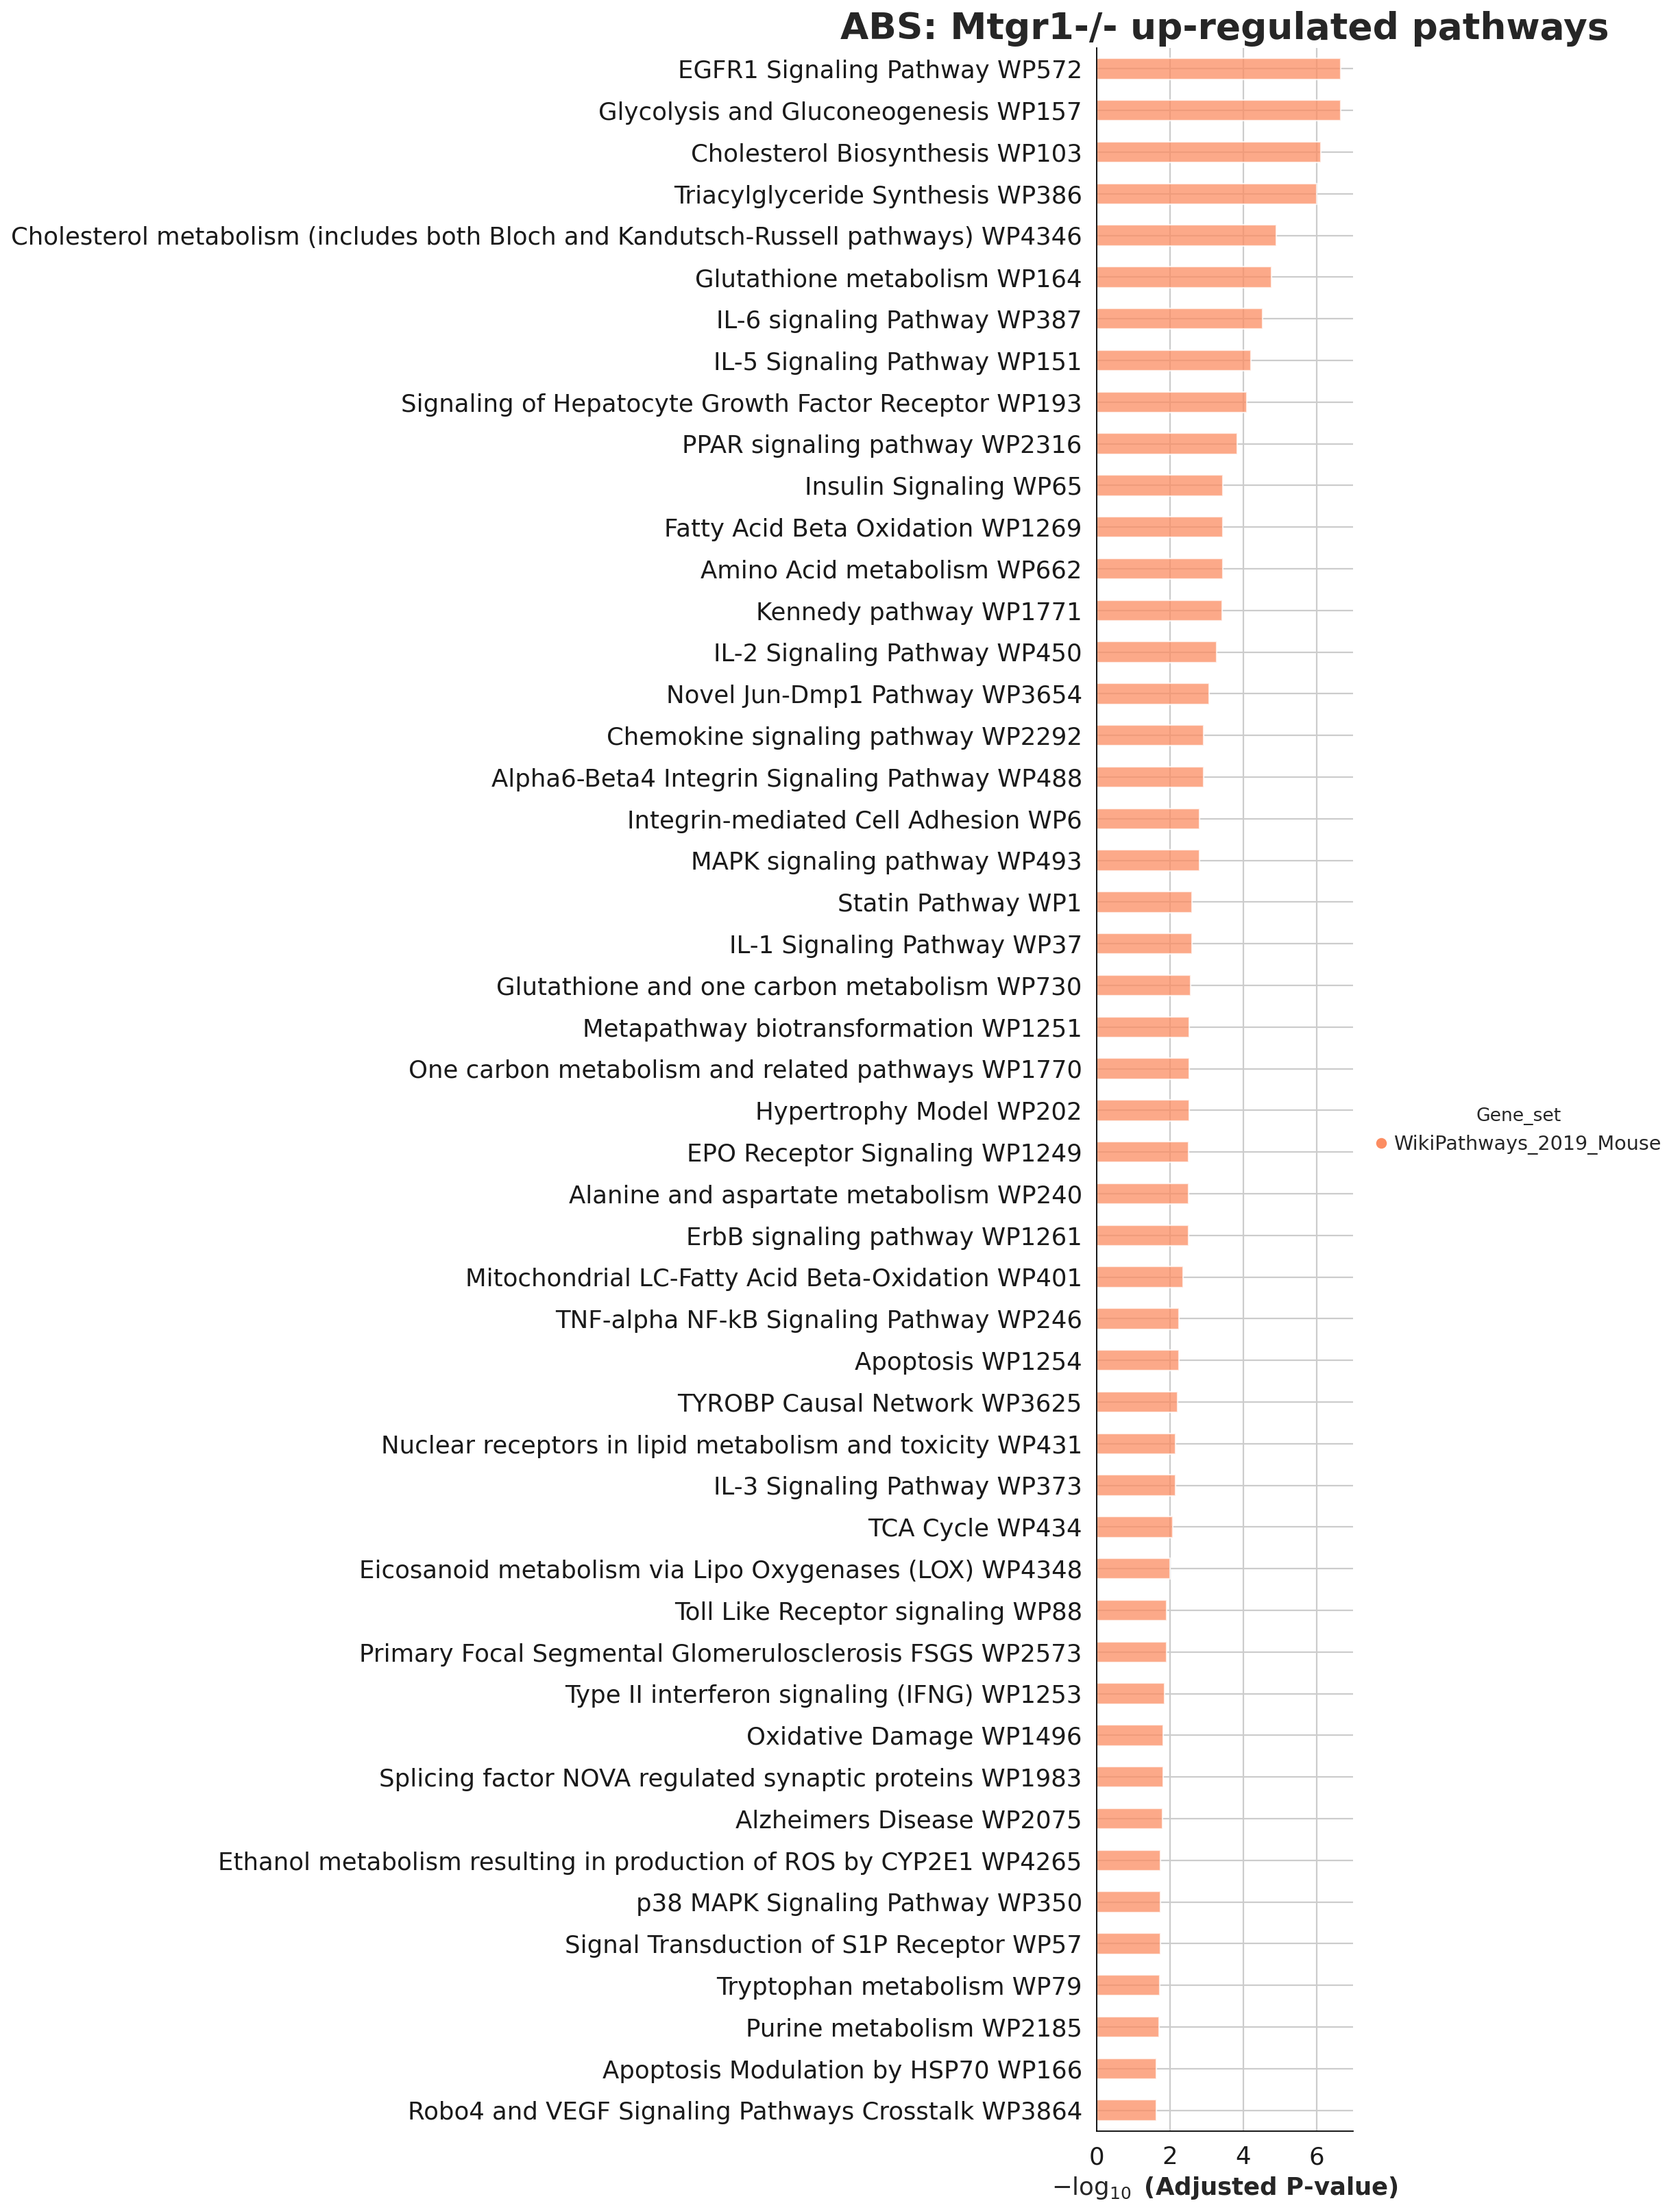

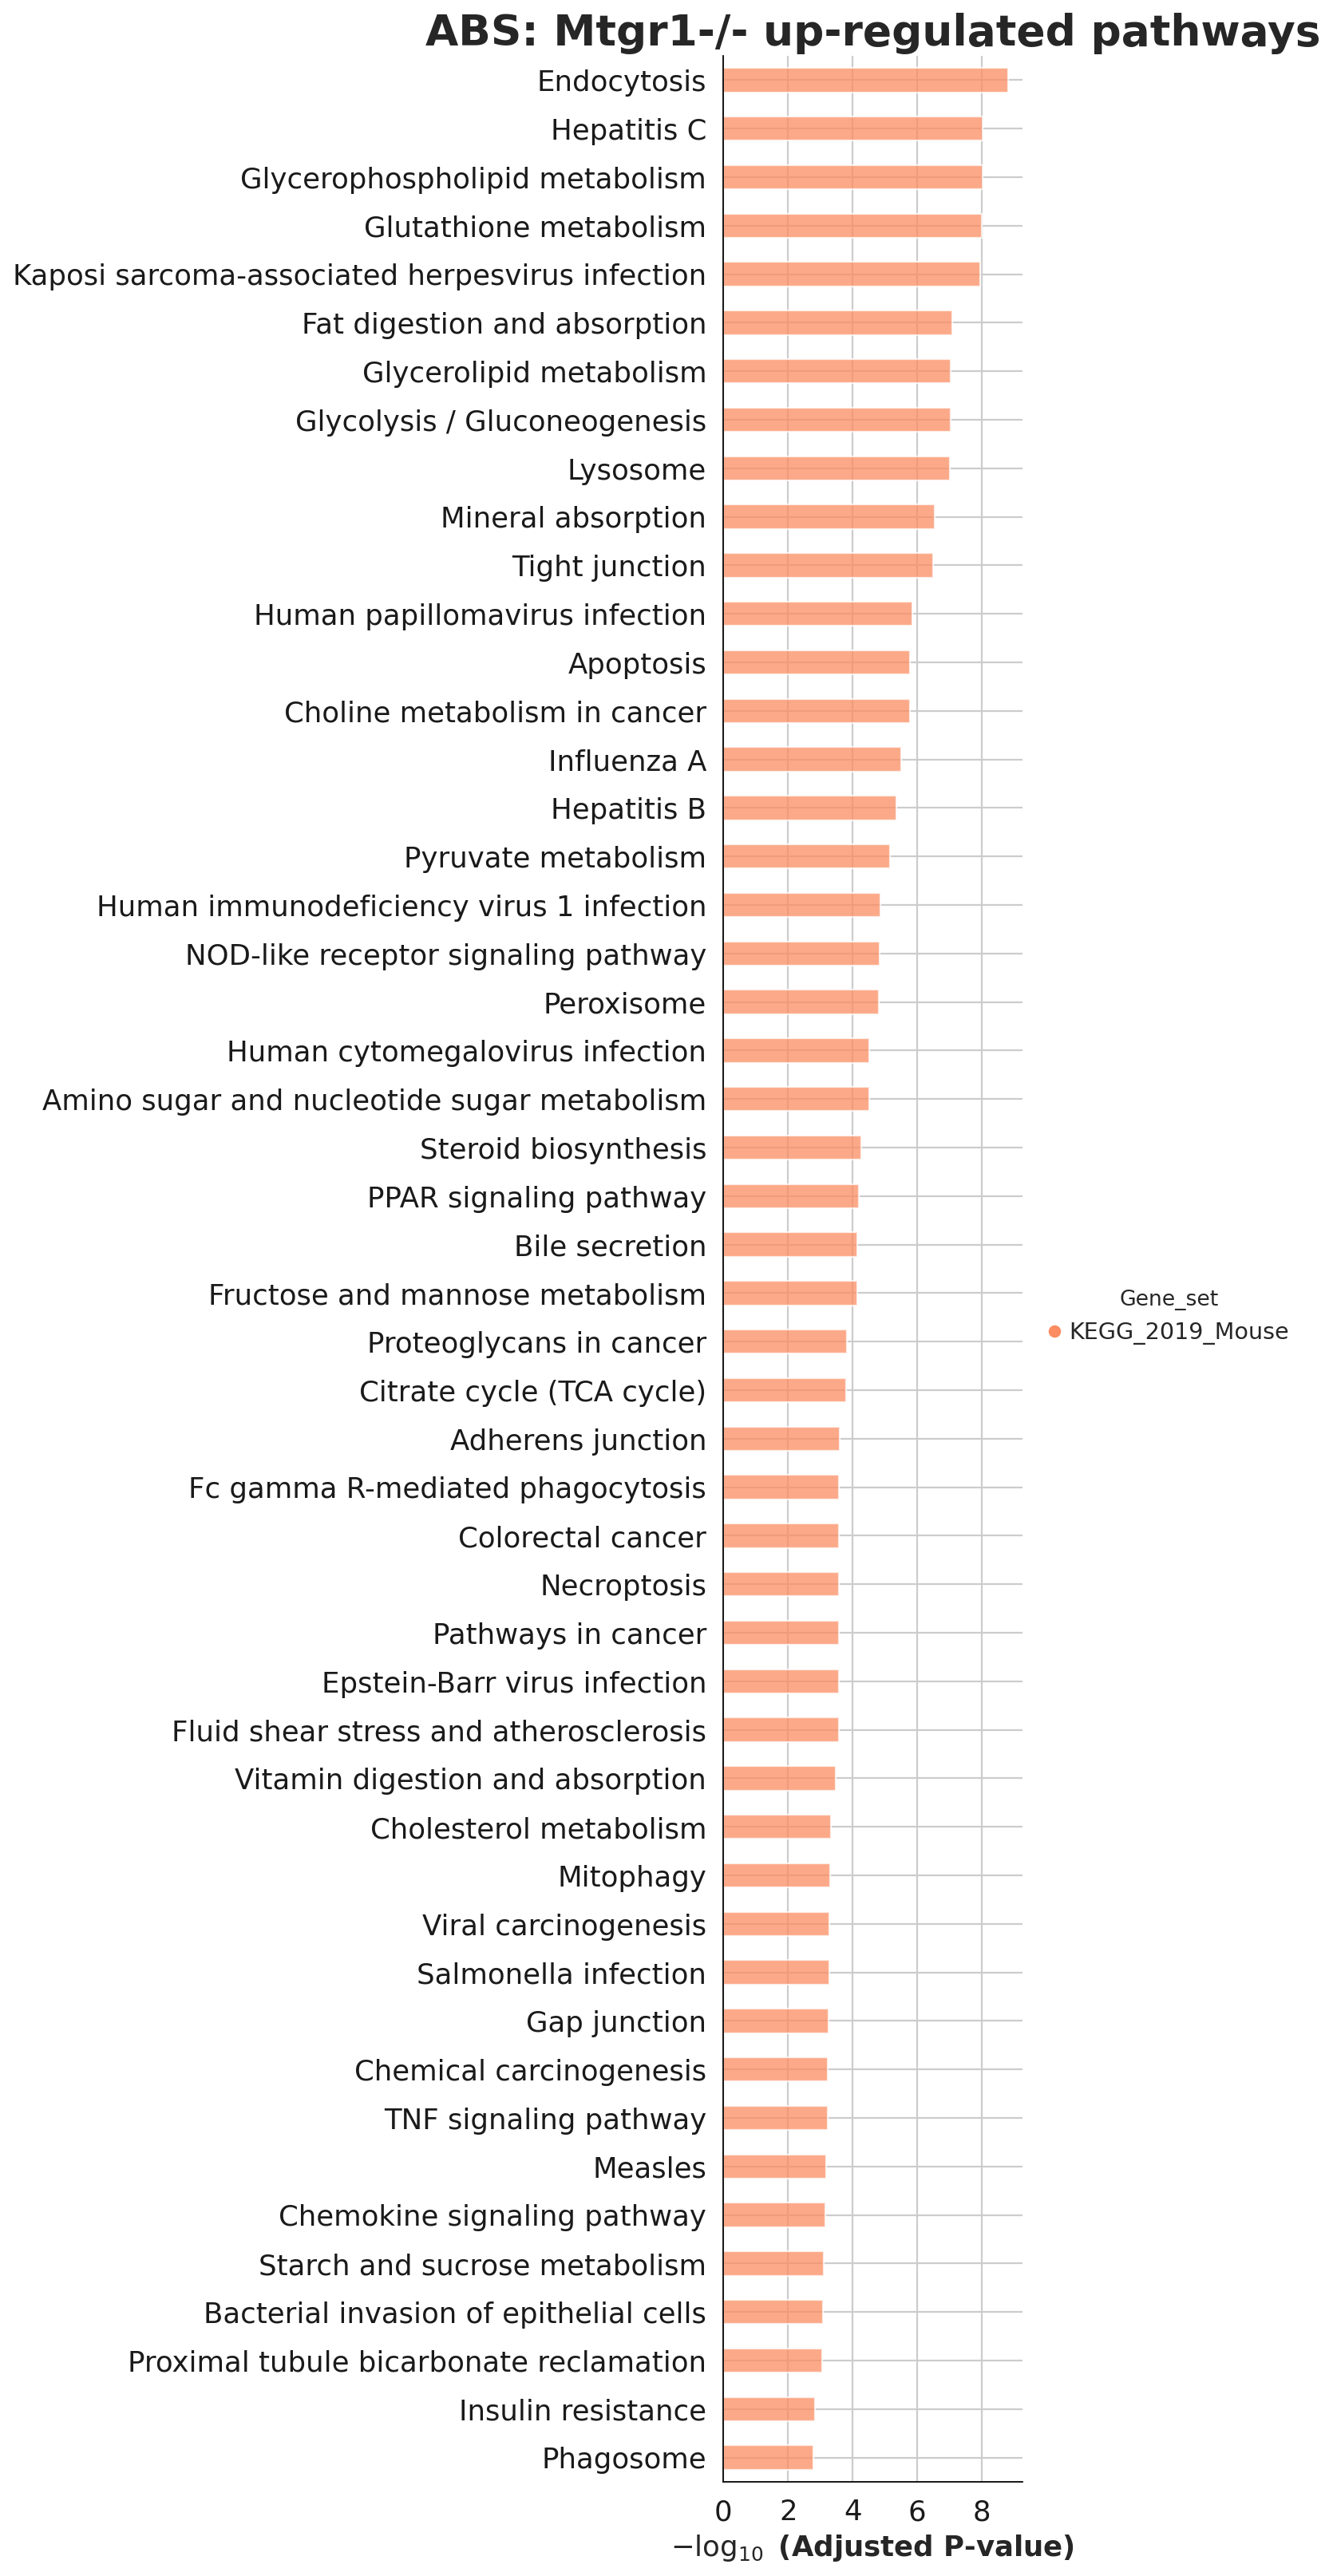

In [70]:
for er in t5_mut_enr_ls:
    significant_term = er.results[ er.results['Adjusted P-value'] < 0.05 ]
    num_terms = min( 50, significant_term.shape[0] )
    x = gp.barplot(er.results,
                   title = 'ABS: Mtgr1-/- up-regulated pathways', 
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=10,
                  top_term=50,
                  figsize=(3,round( 0.5 * num_terms) ),
                   color = clr[1]
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

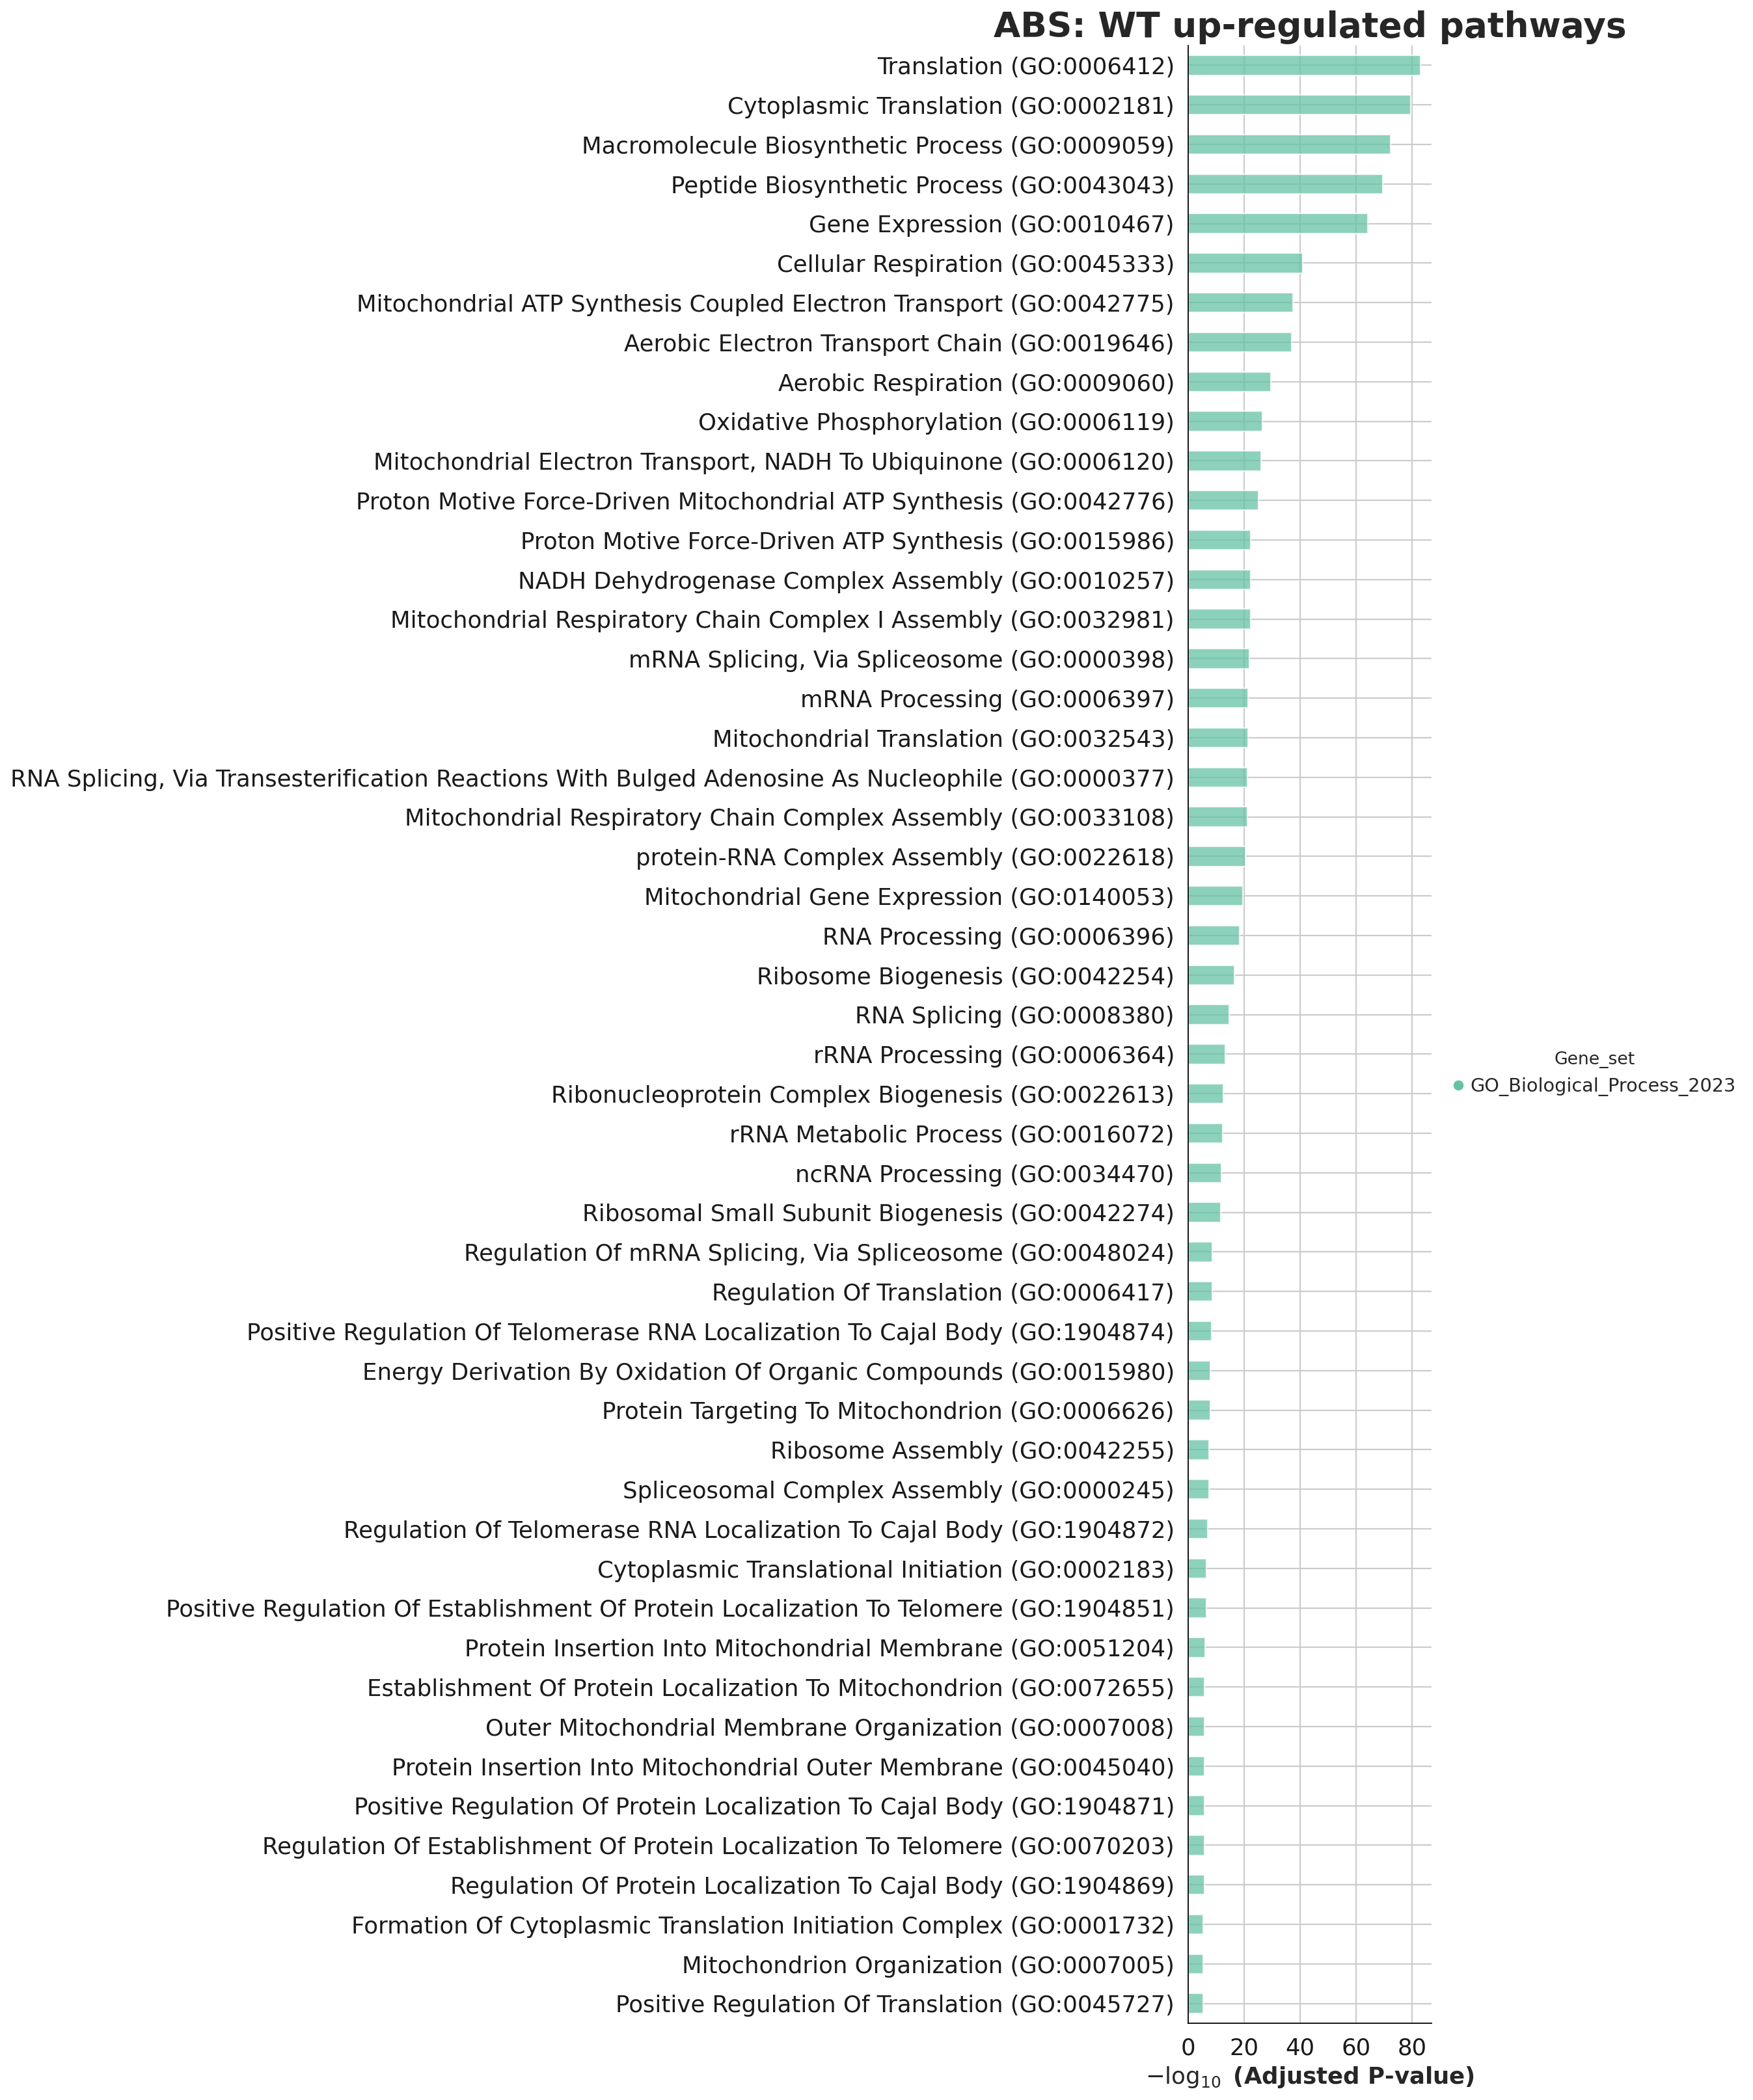

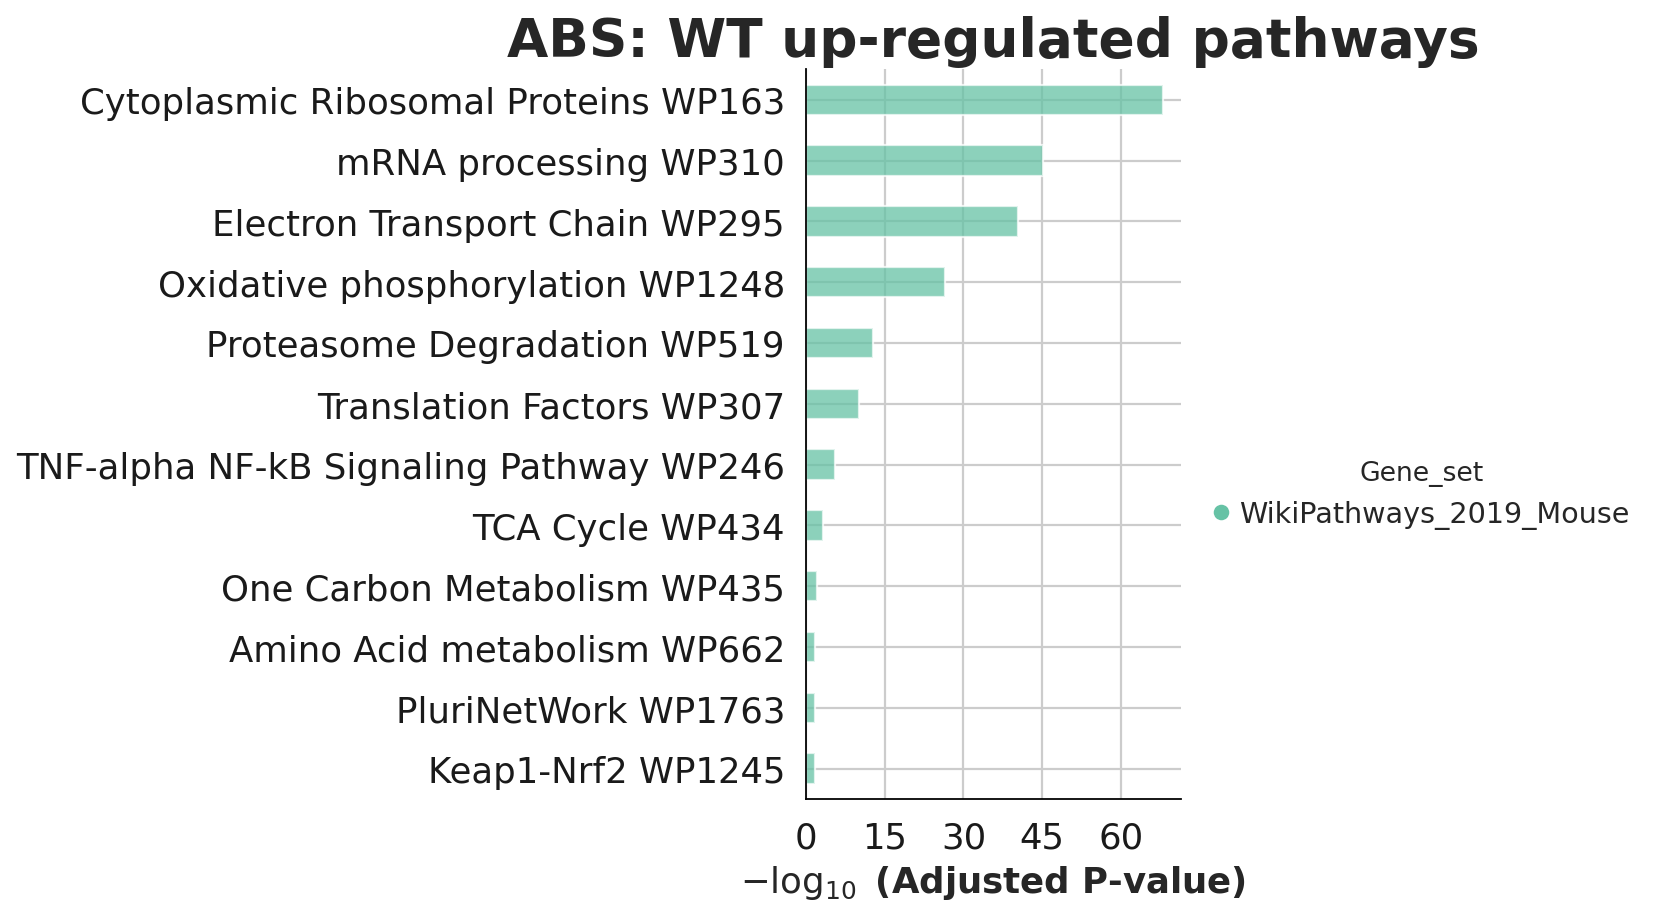

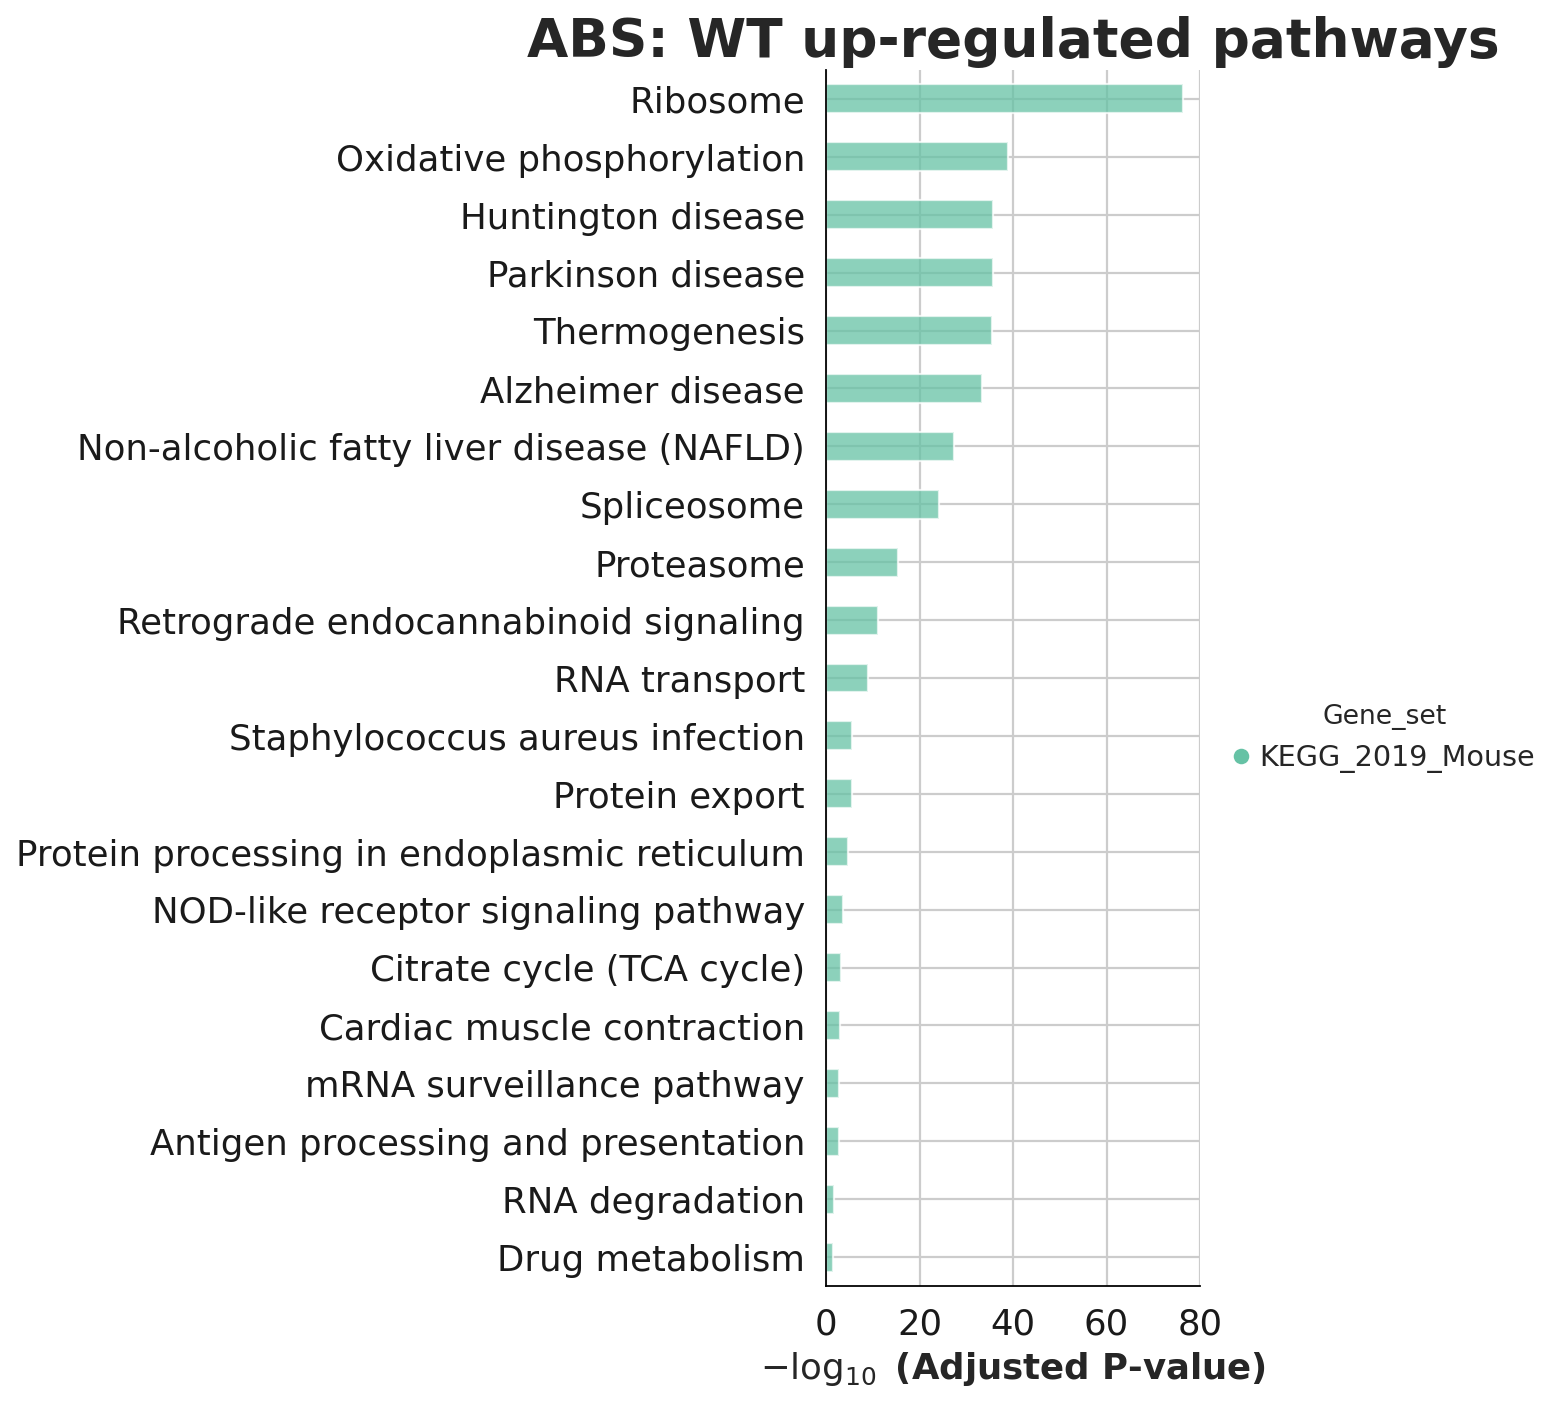

In [72]:
for er in t5_wt_enr_ls:
    significant_term = er.results[ er.results['Adjusted P-value'] < 0.05 ]
    num_terms = min( 50, significant_term.shape[0] )
    x = gp.barplot(er.results,
                   title = 'ABS: WT up-regulated pathways', 
                  column="Adjusted P-value",
                  group='Gene_set', # set group, so you could do a multi-sample/library comparsion
                  size=10,
                  top_term=50,
                  figsize=(3,round( 0.5 * num_terms) ),
                   color = clr[0]
                  #color=['darkred', 'darkblue'] # set colors for group
                  #color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkblue'}
                 )

In [3]:
import Bio
from Bio import Entrez as enz

In [12]:
from Bio import SeqIO

In [4]:
enz.email = 'zhengyi.chen@vanderbilt.edu'

In [11]:
stream = enz.efetch(db="protein", id="NP_031419.1", rettype="gb", retmode="text")

In [16]:
#record1 = enz.read(stream)
record2 = SeqIO.read( stream, 'genbank' )

In [17]:
#type( record)
stream.close()

In [18]:
type( record)

Bio.Entrez.Parser.DictionaryElement

In [22]:
dir( record2)

['_AnnotationsDict',
 '_AnnotationsDictValue',
 '__add__',
 '__annotations__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_per_letter_annotations',
 '_seq',
 '_set_per_letter_annotations',
 '_set_seq',
 'annotations',
 'count',
 'dbxrefs',
 'description',
 'features',
 'format',
 'id',
 'islower',
 'isupper',
 'letter_annotations',
 'lower',
 'name',
 'reverse_complement',
 'seq',
 'translate',
 'upper']

In [35]:
len( record2.features )

9

In [32]:
type( record2.features[0] )

Bio.SeqFeature.SeqFeature

In [36]:
dir( record2.features[8] )

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_flip',
 '_get_ref',
 '_get_ref_db',
 '_get_strand',
 '_set_ref',
 '_set_ref_db',
 '_set_strand',
 '_shift',
 'extract',
 'id',
 'location',
 'qualifiers',
 'ref',
 'ref_db',
 'strand',
 'translate',
 'type']

In [42]:
record2.features[8].qualifiers['gene']

['Actb']

In [45]:
for s in record2.features:
    if( s.type == 'CDS'):
        print( s.qualifiers['gene'][0] )

Actb


## save data

In [69]:
mut_dge_res.to_csv("./abs_dge.csv", header = True, index = True)